# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
df=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.info() #посмотрим информацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Расшифруем названия столбцов:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

#### Выполним обзор данных:

In [2]:
df.head(10)
pd.set_option('display.max_columns', None)

#### Построим гистограммы:

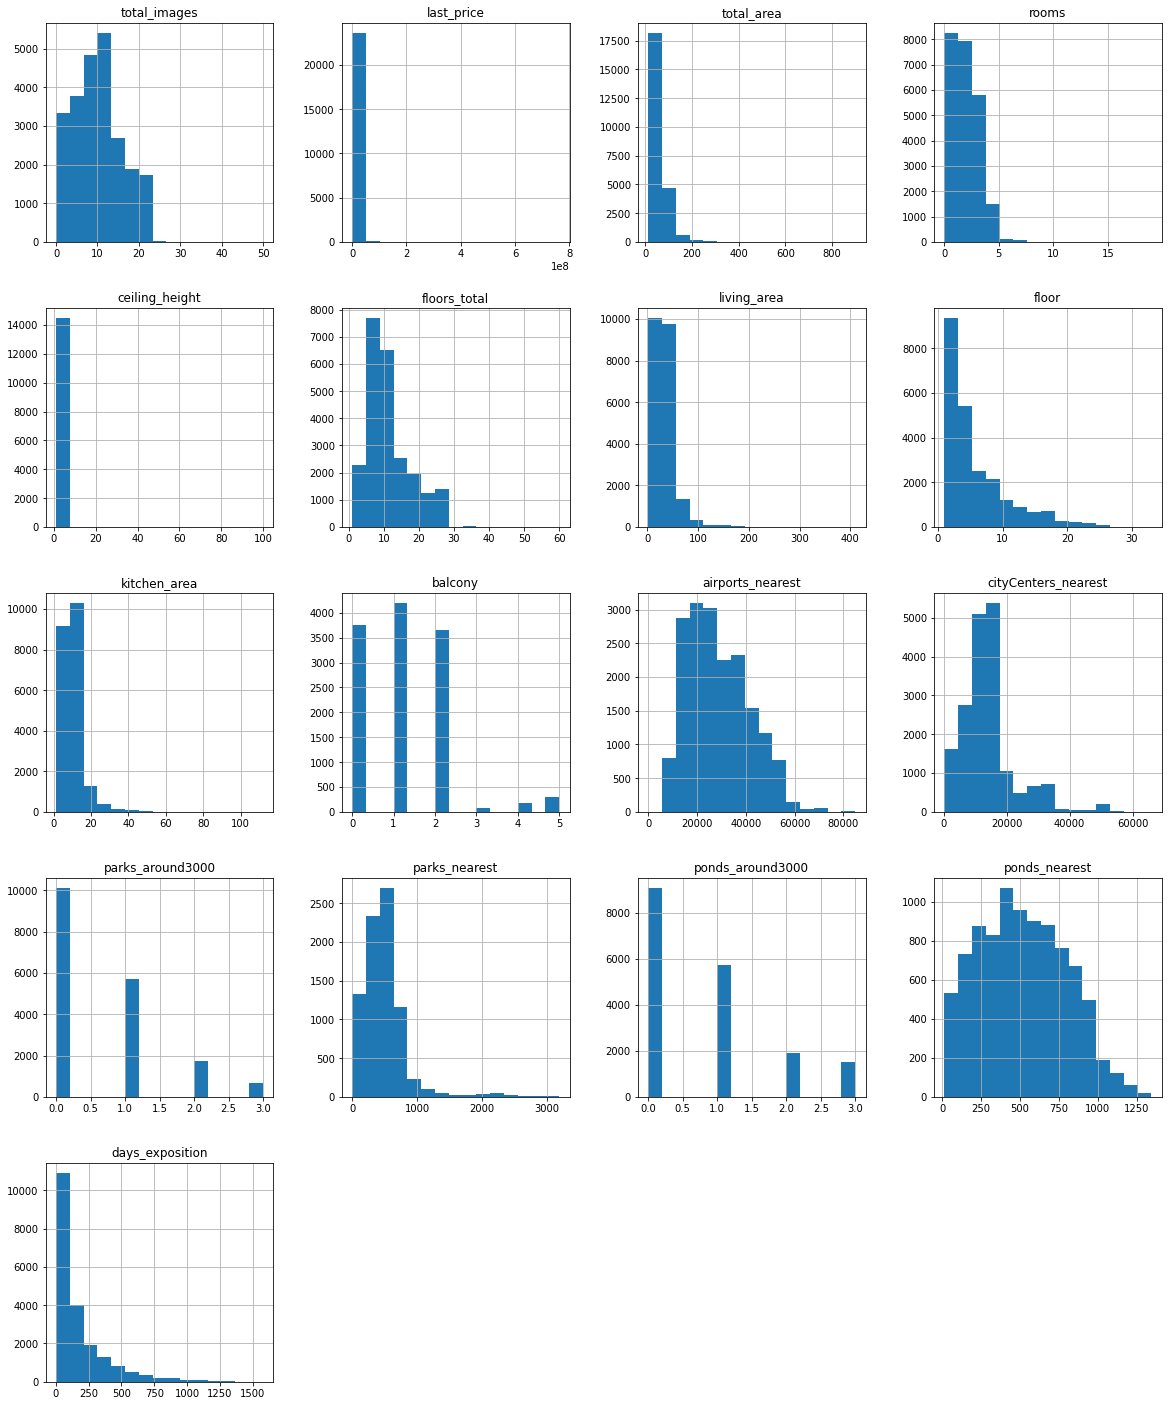

In [3]:
df.hist(figsize=(20, 25), bins=15);

По гистограммам пока мало что можно с уверенностью сказать. На первый взгляд распределение выглядит логичным, похоже в данных критических ошибок нет.

In [4]:
df.describe() #вызовем метод описания данных и узнаем, где располагаются границы квартилей

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
print(df.duplicated().sum())#проверим на дубликаты

0


Что можем сказать на первый взгляд:
- В датафрейме 23699 строк и 22 колонки
- Есть ошибки в типах данных (напимер,floors_total - int64)
- Имеются пропуски в столбцах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition 
- Дубликаты отсутствуют, что хорошо
- В столбце days_exposition подозрительно много нулевых значений

#### Посчитаем количество пропусков:

In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
df['days_exposition'].value_counts(ascending=True)

1174.0      1
1325.0      1
709.0       1
696.0       1
1081.0      1
1111.0      1
1105.0      1
987.0       1
1114.0      1
1413.0      1
734.0       1
971.0       1
1112.0      1
1513.0      1
898.0       1
730.0       1
975.0       1
1485.0      1
793.0       1
1076.0      1
1315.0      1
1299.0      1
1355.0      1
1322.0      1
1232.0      1
1484.0      1
1292.0      1
844.0       1
963.0       1
1280.0      1
1452.0      1
985.0       1
773.0       1
1344.0      1
1187.0      1
830.0       1
923.0       1
1206.0      1
1218.0      1
797.0       1
1016.0      1
774.0       1
681.0       1
1011.0      1
768.0       1
1336.0      1
1252.0      1
978.0       1
1072.0      1
1175.0      1
982.0       1
1229.0      1
1125.0      1
871.0       1
1318.0      1
1434.0      1
803.0       1
885.0       1
1360.0      1
897.0       1
1489.0      1
1309.0      1
1146.0      1
1580.0      1
673.0       1
993.0       1
866.0       1
1151.0      1
1082.0      1
1060.0      1
991.0       1
1127.0

### Предобработка данных

Переименуем столбец cityCenters_nearest для лучшей читаемости:

In [8]:
df.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)

#### Изучим пропуски:


9195 ceiling_height - практически в трети объявлений пропущена высота потолков, заменим на среднее значение.

86 floors_total - данные просто не заполнили, из выборки, оставим Null.

1903 living_area - оставим Null.

2775 is_apartment -можем предположить что это не апартаменты и присвоить False.

2278 kitchen_area - проверить не студия ли это? Если нет, то оставим Null.

11519 balcony - скорее всего там нет балконов, заполняем 0

49 locality_name - данные просто не заполнили, оставим Null

5542 airports_nearest - аэропортов рядом нет, оставляем Null

5519 city_centers_nearest - центр города не близко, оставляем Null

5518 parks_around3000 - значит парков нет в радиусе 3км, оставляем Null

15620 parks_nearest - значит парков нет, оставляем Null

5518 ponds_around3000 - значит прудов нет в радиусе 3км, оставляем Null

14589 ponds_nearest - оставляем Null, прудов может и не быть

3181 days_exposition - объявление не было опубликовано, оставляем Null

#### Посчитаем количество пропусков в процентах:

In [9]:
#Используем функцию для перевода df.info() в DataFrame
def infoOut(data,details=False):
    dfInfo = data.columns.to_frame(name='Column')
    dfInfo['Non-Null Count'] = data.notna().sum()
    dfInfo['Dtype'] = data.dtypes
    dfInfo.reset_index(drop=True,inplace=True)
    if details:
        rangeIndex = (dfInfo['Non-Null Count'].min(),dfInfo['Non-Null Count'].min())
        totalColumns = dfInfo['Column'].count()
        dtypesCount = dfInfo['Dtype'].value_counts()
        totalMemory = dfInfo.memory_usage().sum()
        return dfInfo, rangeIndex, totalColumns, dtypesCount, totalMemory
    else:
        return dfInfo
df_info_table=infoOut(df)  

dff=df.isna().sum() #подсчитываем сумму пропусков по столбцам
dff=dff.to_dict() #создаем словарь
df_info_table['Null_quontity'] = df_info_table['Column']
df_info_table['Null_quontity']=df_info_table['Null_quontity'].map(dff) #производим подстановку
df_info_table.drop(['Dtype'], axis=1, inplace=True)#удаляем столбец Dtype
df_info_table=df_info_table.assign(Total=23699) #добавляем столбец Total для удобства вычислений
df_info_table['Percentage_lost'] = (df_info_table['Null_quontity'] / 
                    df_info_table['Total'] * 100) #считаем процент пропусков от всех значений
df_info_table['Percentage_lost']=df_info_table['Percentage_lost'].round()
#отсортируем по убыванию:
df_info_table=df_info_table.sort_values('Percentage_lost', ascending=False)
df_info_table

,Column,Non-Null Count,Null_quontity,Total,Percentage_lost
9,is_apartment,2775,20924,23699,88.0
18,parks_nearest,8079,15620,23699,66.0
20,ponds_nearest,9110,14589,23699,62.0
13,balcony,12180,11519,23699,49.0
5,ceiling_height,14504,9195,23699,39.0
19,ponds_around3000,18181,5518,23699,23.0
17,parks_around3000,18181,5518,23699,23.0
16,city_centers_nearest,18180,5519,23699,23.0
15,airports_nearest,18157,5542,23699,23.0
21,days_exposition,20518,3181,23699,13.0


#### Что можно сказать дополнительно по пропускам:

1.Больше всего пропусков в поле "является ли апартаментами" оно не заполнено у 88% объектов. Скорее всего, если поле не заполнено, то перед нами квартира (Либо это не обязательный признак на этапе заполнения и нужно проводить дополнительную верификацию). Заменим отсутствующие значения на False. Тип столбца изменим на булев.

2.В столбцах parks_around3000, parks_nearest, ponds_around3000, ponds_nearest пропущено до 66% данных. Эти пропуски оставим без изменений - без точного адреса их не восстановить, а в исследовании они нам не понядобятся. Скорее всего эти данные считаются автоматически при указании адреса объекта, поэтому вероятнее всего в радусе 3 км этих объектов инфраструктуры просто нет.

3.У 49 объектов не указан населенный пункт. Данную информацию невозможно восстановить, поэтому эти строки решено удалить. В будущем необходимо контролировать ввод этого значения пользователем или автоматизировать на основе точного адреса объекта.


#### Приведем данные к корректным типам:

Заполнем пропущенные значения в столбце is_apartment как 'False'

In [10]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Переведем цены в столбце last_price в тысячи

In [11]:
df['last_price'] = df['last_price'] / 1000 # отбросим три нуля

Заполнем Null балконы как '0'

In [12]:
df['balcony'] = df['balcony'].fillna(0)

Удалим строки с Null locality_name

In [13]:
df['locality_name'].dropna(inplace=True)

Удалем строки с Null floors_total

In [14]:
df = df.dropna(subset=['floors_total'])

Приведем данные к корректным типам:

In [15]:
df.info()#Изучим типы данных:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        14495 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21743 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          21382 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Изменим типы данных следующих столбцов:

- first_day_exposition - date         (для упрощения операций)
- floors_total - Int64                (этажей может быть только целое число)
- balcony - int64                     (балконов может быть только целое число)
- days_exposition - int64             (дней может быть только целое число)
- airports_nearest - int64            (расстояние в метрах, нет смысла считать сантиметры)
- city_centers_nearest - int64        (расстояние в метрах, нет смысла считать сантиметры)
- parks_around3000 - int64            (парков может быть только целое число)
- parks_nearest - int64               (парков может быть только целое число)
- ponds_around3000 - int64            (прудов может быть только целое число)
- ponds_nearest - int64               (прудов может быть только целое число)

Меняем:

In [16]:
#Сразу заполним пропуски, чтобы иметь возможность изменить тип
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
df['floors_total'] = df['floors_total'].astype('int64')
df['balcony'] = df['balcony'].astype('int64')
df['days_exposition'] = df['days_exposition'].fillna(0)
df['days_exposition'] = df['days_exposition'].astype('int64')
df['airports_nearest'] = df['airports_nearest'].fillna(0)
df['airports_nearest'] = df['airports_nearest'].astype('int64')
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(0)
df['city_centers_nearest'] = df['city_centers_nearest'].astype('int64')
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].astype('int64')
df['parks_nearest'] = df['parks_nearest'].fillna(0)
df['parks_nearest'] = df['parks_nearest'].astype('int64')
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].astype('int64')
df['ponds_nearest'] = df['ponds_nearest'].fillna(0)
df['ponds_nearest'] = df['ponds_nearest'].astype('int64')

Проверяем:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

С типами все хорошо, посмотрим, что из пропусков у нас осталось:

In [18]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9118
floors_total               0
living_area             1870
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2231
balcony                    0
locality_name             48
airports_nearest           0
city_centers_nearest       0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
dtype: int64

#### Дозаполним пропуски:

##### Изучим столбец ceiling_height:

In [19]:
#df['ceiling_height']=df['ceiling_height'].fillna(0) #заменим на 0 для удобства вычислений
df['ceiling_height'].isna().sum()
df['ceiling_height'].value_counts()

2.50      3515
2.60      1646
2.70      1573
3.00      1111
2.80       988
2.55       980
2.75       910
2.65       674
3.20       277
3.10       203
2.90       164
3.30       141
2.56       139
3.50       130
2.57       103
2.85       101
3.40        92
2.54        83
2.64        81
2.52        79
2.53        67
2.58        63
2.77        61
2.76        60
3.15        57
2.78        51
2.95        47
3.05        46
4.00        39
3.25        36
3.60        36
2.67        36
2.73        35
2.51        34
2.72        31
3.70        30
2.74        28
2.68        23
2.40        23
3.80        20
2.84        19
3.55        18
2.82        18
2.66        17
3.12        17
3.35        16
2.45        15
2.83        15
2.59        14
2.62        14
3.90        14
3.08        14
2.71        13
2.63        13
2.88        12
2.00        11
3.18        11
3.13        11
3.06        11
3.07        11
3.33        10
2.87        10
2.79        10
4.20        10
2.81         9
2.92         9
3.45      

In [20]:
# #df['ceiling_height'].unique()
# plt.figure(figsize=(23, 4))
# sns.boxplot(df['ceiling_height'])

In [21]:
#df['ceiling_height'].value_counts()
print(df.loc[(df['ceiling_height'] > 6), 'ceiling_height'].value_counts())

27.0     8
25.0     7
8.0      3
32.0     2
14.0     1
20.0     1
24.0     1
27.5     1
10.3     1
8.3      1
22.6     1
26.0     1
100.0    1
Name: ceiling_height, dtype: int64


In [22]:
#Уберем явные ошибки ввода, поделив на 10
df.loc[(df['ceiling_height'] >= 24) & 
       (df['ceiling_height'] <= 32), 'ceiling_height'] = df['ceiling_height'] / 10
#посмотрим, сколько квартир с потолком больше 6
print(df.loc[(df['ceiling_height'] > 6), 'ceiling_height'].value_counts())

8.0      3
14.0     1
20.0     1
10.3     1
8.3      1
22.6     1
100.0    1
Name: ceiling_height, dtype: int64


Целых 3 раза встречается высота в 8 метров, 1 - в 8.3. Удельный вес данных занчений не большой,рассчеты они сильно не исказят,а встречается солишком часто для опечатки. Оставим их, а остальные исключим.
Нулевые значения заполним средним, поскольку ярко выраженные выбросы на данный момент отсутствуют.

In [23]:
df.drop(df[df.ceiling_height > 8.3].index, inplace=True)
#Проверяем 
# Заполняем нулевые значения средним
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mean()) 
#df['ceiling_height'].value_counts()

##### Изучим столбец living_area

Пропуски в столбце "living_area" заменим на медианы значений жилой площади по каждому значению кол-ва комнат столбца "rooms". Для этого напишем цикл, перебирающий уникальные значения столбца 'rooms' и в случае пропуска в столбце 'living_area', заменит на медианное значение жилой площади по данному количеству комнат

In [24]:
median_rooms = df.groupby('rooms')['living_area'].median()
for total in df['rooms'].unique():
    df.loc[(df['rooms'] == total) & (df['living_area'].isna()), 'living_area'] = median_rooms[total]
median_rooms   
    

rooms
0      18.000
1      17.600
2      30.500
3      45.000
4      63.500
5      91.785
6     124.400
7     145.000
8     161.000
9     179.200
10    161.400
11    133.900
12    409.700
14    195.150
15    409.000
16    180.000
19    264.500
Name: living_area, dtype: float64

##### Изучим столбец locality_name

In [25]:
df['locality_name'].unique() #выведем список уникальных значений

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Для начала заменим все "ё" на "е" во избежание задвоения:

In [26]:
df=df.replace('ё', 'е', regex=True) #проводим замену
df['locality_name'].unique() #проверяем

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

Избавимся от попусков:

In [27]:
df.dropna(subset=['locality_name'], inplace=True) # избавляемся от пропусков

Упомянутые в задании **поселок Рябово** (координаты 60.338124, 28.990898) и **поселок городского типа Рябово** (координаты 59.418549, 31.130892) являются все-таки разными населенными пунктами, а не неявными дубликатами.

Я понимаю, что имеется ввиду задание отбросить признаки вроде "поселок" или поселок "городского типа" и посмотреть, сколько в данном случае будет неявных дубликатов, но сомневаюсь в целесообразности данного действия. В первую очередь потому, что назначение адреса происходит через API карт, и вероятность ошибки в типе населенного пункта крайне мала.

Тем не менее, проверим, сколько у нас существует таких населенных пунктов, отличающихся только типами населенного пункта, но с одинаковыми названиями. Для этого уберем все слова, начинающиеся со строчных символов (сами названия населенных пунктов все начинаются с заглавных) и посмотрим, на сколько будет отличаться количество уникальных значений от изначального

In [28]:
list_local=df['locality_name'].unique() #изучим уникальные значения
#list_local

In [29]:
import re
list_place_before=df['locality_name'].to_list() #переведем столбец в тип list для удобства операций
result = re.sub(r'\b[а-я]+\s*', "", str(list_place_before)).strip() # удалим все слова, которые начинаются со строчной буквы, 
list_place_after=eval(result)      #вернем тип list для удобства операций
print(sorted(set(list_place_after)))      #для просмотра уникальных значений списка сокращенных названий

['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров', 'Бокситогорск', 'Большая Вруда', 'Большая Ижора', 'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино', 'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь', 'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево', 'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово', 'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово', 'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево', 'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово', 'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка', 'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково', 'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск', 'Зимитицы', 'Ивангород', 'Извара', 'Ильичево', 'Иссад', 'Калитино', 'Каложицы', 'Кальтино', 'Каменногорск', 'Камышовка', 'Каськово', 'Кел

Посчитаем, насколько отличается количество уникальных значений до и после обработки:

In [30]:
before=df['locality_name'].nunique() # Получаем кол-во уникальных значений до
after=len(set(list_place_after))    #Получаем кол-во уникальных значений после
print('Количество до обработки - ', before, ', количество после обработки - ', after)
print('Разница - ', before-after, 'или', round(((before-after)/before)*100, 2),'%')

Количество до обработки -  330 , количество после обработки -  305
Разница -  25 или 7.58 %


Показатель ниже 10%, можно легко объяснить наличием нескольких населенных пунктов разных типов с одним названием. 
Но на всякий случай проанализируем чуть глубже, чтобы убедиться, что дело только в этом:

In [31]:
names_frame= []          #создадим пустой список
list_place_sorted=df['locality_name'].to_list() #переведем столбец locality_name в список для удобства операций
list_place_sorted=set(list_place_sorted)   #оставим только уникальные значения
for j in set(list_place_after):         #напишем цикл для сопоставления коротких и полных названий населенных пунктов
    for i in list_place_sorted:
        if j in i:
            names_frame.append(
        {
            'Название': j,
            'Полное_название': i,
        } )

names_frame=pd.DataFrame(names_frame) #переведем в DataFrame
# добавим столбец с числом вхождений одного названия
names_frame['Counts'] = names_frame.groupby(['Название']).transform('count') 
rslt_df = names_frame[names_frame['Counts'] > 1] #отфильтруем только те строки, где вхождений больше 1
rslt_df

,Название,Полное_название,Counts
18,Приветнинское,поселок станции Приветнинское,2
19,Приветнинское,поселок при железнодорожной станции Приветнинское,2
25,Калитино,деревня Калитино,2
26,Калитино,поселок Калитино,2
33,Мга,поселок городского типа Мга,2
34,Мга,городской поселок Мга,2
35,Кингисепп,поселок Кингисеппский,2
36,Кингисепп,Кингисепп,2
60,Рахья,садовое товарищество Рахья,2
61,Рахья,поселок городского типа Рахья,2


Итак, моя изначальная теория не подтвердилась, налицо следующие дубликаты:
- "городской поселок" и "поселок городского типа"
- "поселок при железнодорожной станции" и "поселок станции"
- "коттеджный поселок" и "поселок"

Исправим это:

In [32]:
df=df.replace('городской поселок', 'поселок городского типа', regex=True)  #производим замену
df=df.replace('поселок станции', 'поселок при железнодорожной станции', regex=True)
df=df.replace('коттеджный поселок', 'поселок', regex=True)

In [33]:
df['locality_name'].unique() #проверяем

array(['Санкт-Петербург', 'поселок Шушары',
       'поселок городского типа Янино-1', 'поселок Парголово',
       'поселок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посел

##### Изучим столбец kitchen_area

In [34]:
df.loc[df['studio'] == True, 'kitchen_area'] = 0 #В студиях выделенных кухонь нет
df.loc[df['is_apartment'] == True, 'kitchen_area'] = 0
df.loc[df['open_plan'] == True, 'kitchen_area'] = 0
print(df.loc[(df['kitchen_area'] > 20), 'kitchen_area'].value_counts())

25.00     61
30.00     60
22.00     55
21.00     41
23.00     40
24.00     32
26.00     30
28.00     27
35.00     25
40.00     24
27.00     16
45.00     14
50.00     12
21.50     12
36.00     12
32.00     11
22.50      9
33.00      9
41.00      8
23.30      8
29.00      8
31.00      8
22.30      8
20.50      7
21.30      7
20.70      7
24.50      7
20.60      7
21.90      6
21.40      6
23.10      6
24.40      6
22.40      6
23.50      6
38.00      6
22.70      5
37.00      5
34.00      5
29.40      5
20.80      5
27.90      5
39.00      5
21.10      5
21.70      5
22.10      5
24.70      5
23.90      5
29.90      4
22.60      4
46.00      4
20.10      4
23.80      4
21.20      4
25.30      4
20.90      4
60.00      3
21.60      3
20.30      3
56.00      3
51.00      3
26.40      3
30.20      3
32.10      3
23.60      3
37.70      3
27.40      3
44.00      3
22.20      3
42.00      3
43.40      3
25.20      3
28.40      3
48.00      3
24.30      3
21.80      3
22.90      3
64.00      3

In [35]:
area_check = df.total_area - df.kitchen_area - df.living_area 

#= (df.total_area - df.kitchen_area) * 0.8
# area_check = df.total_area - df.kitchen_area - df.living_area
# df[area_check <= 0]['rooms'].count() 
#display(df['kitchen_area'].unique())

Существует мнение, что кухня составляет 15-20% от общей площади квартиры. Проверим, так ли это:

In [36]:
area=df[["total_area","living_area","kitchen_area"]] #создаем срез
#добавляем вычисляемый столбец с процентным отношением площади кухни к общей площади квартиры:
area['%_from total']=round(area['kitchen_area']/area['total_area']*100, 2)
kitchen_mean=area['%_from total'].mean().round(2)
print('среднее - ',area['%_from total'].mean().round(2))  #считаем среднее
print('медиана - ',area['%_from total'].median())  #считаем медиану

среднее -  18.5
медиана -  17.12


/tmp/ipykernel_174/4204999986.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area['%_from total']=round(area['kitchen_area']/area['total_area']*100, 2)


Теория подтверждается, средний коэфициент - 19%. Заполним пропуски исходя из него:

In [37]:
df.loc[df['kitchen_area'] == '  nan','kitchen_area'] = None #заменим nan на None для удобства
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * kitchen_mean) #заполним пропуски исходя из пропорции

In [38]:
area=area.loc[area['%_from total'] > 30]
area=area.sort_values(by=['%_from total'])
area.count()

total_area      1371
living_area     1371
kitchen_area    1371
%_from total    1371
dtype: int64

count    23560.000000
mean       102.266917
std        375.531928
min          0.000000
25%          7.100000
50%          9.800000
75%         13.025000
max       9250.000000
Name: kitchen_area, dtype: float64

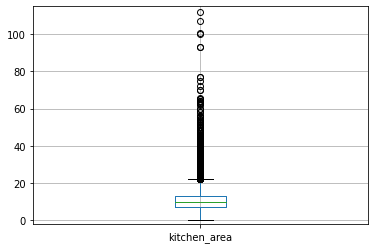

In [39]:
def draw_boxplot(col, ymin=-50, ymax=200):
    plt.ylim(ymin, ymax)
    df.boxplot(col)
draw_boxplot('kitchen_area', -2, 115)
df['kitchen_area'].describe()

Какое-то количество кухонь занимают от 30; до почти 80%(!) от общей площади. Аппартаменты, студии и открытые планировки мы уже откинули, да и общая площадь (в некоторых случаях под 100 квадратных метров) не позволяет подозревать особенности планировки. Посчитаем процент таких случаев от всех:

In [40]:
error=round((1371/23699*100),2)
print('Процент кухонь площадью выше 30% от общей площади', error,'%')

Процент кухонь площадью выше 30% от общей площади 5.79 %


Процент слишком мал, а отклонения слишком серьезны, чтобы их отсавлять. Избавимся от них:

In [41]:
df['k_percent_from_total']=round(df['kitchen_area']/df['total_area']*100, 2) #создаем столбец в мастер-данных
df.drop(df[df.k_percent_from_total > 30].index, inplace=True) #выбрасываем значения больше 30
df.drop('k_percent_from_total', axis= 1 , inplace= True ) #удалим столбец k_percent_from_total, он больше не нужен
df.info() #проверяем

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20196 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20196 non-null  int64         
 1   last_price            20196 non-null  float64       
 2   total_area            20196 non-null  float64       
 3   first_day_exposition  20196 non-null  datetime64[ns]
 4   rooms                 20196 non-null  int64         
 5   ceiling_height        20196 non-null  float64       
 6   floors_total          20196 non-null  int64         
 7   living_area           20196 non-null  float64       
 8   floor                 20196 non-null  int64         
 9   is_apartment          20196 non-null  bool          
 10  studio                20196 non-null  bool          
 11  open_plan             20196 non-null  bool          
 12  kitchen_area          20196 non-null  float64       
 13  balcony         

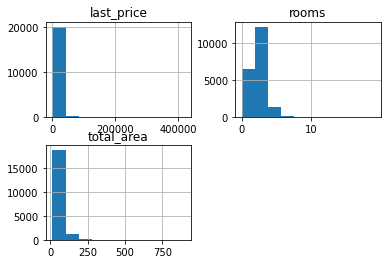

In [42]:
df_an=df[['last_price', 'rooms', 'total_area']]
df_an.hist();

In [43]:
df['last_price'].describe()


count     20196.000000
mean       6462.163294
std        9760.824894
min         430.000000
25%        3450.000000
50%        4650.000000
75%        6755.720500
max      420000.000000
Name: last_price, dtype: float64

(6755.0, 420000.0)

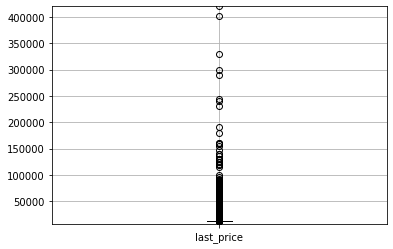

In [44]:
df.boxplot('last_price')
plt.ylim(6755, 420000)

In [45]:
#df[df['last_price'] < 1000].count()

In [46]:
display(df.loc[df['last_price'] < 1000])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
259,6,900.000,30.00,2017-11-21,1,2.500000,5,15.00,4,False,False,False,5.0,1,Ивангород,0,0,0,0,0,0,0
268,7,650.000,46.00,2018-03-15,2,2.500000,5,30.00,5,False,False,False,7.0,0,Сланцы,0,0,0,0,0,0,75
293,2,900.000,42.80,2017-06-14,2,2.727859,5,32.00,5,False,False,False,5.0,0,Сясьстрой,0,0,0,0,0,0,247
606,5,790.000,38.60,2018-04-03,2,3.000000,2,24.00,1,False,False,False,6.0,0,поселок городского типа Синявино,0,0,0,0,0,0,374
638,6,980.000,47.10,2019-04-12,2,2.727859,3,29.00,3,False,False,False,9.0,0,Бокситогорск,0,0,0,0,0,0,0
764,4,950.000,44.00,2018-05-05,2,2.727859,5,30.50,2,False,False,False,6.0,1,Бокситогорск,0,0,0,0,0,0,156
909,6,850.000,35.70,2018-02-01,2,2.727859,2,23.00,1,False,False,False,8.0,0,поселок городского типа Вырица,0,0,0,0,0,0,343
1312,5,750.000,26.00,2018-02-03,1,2.500000,2,18.00,1,False,False,False,6.0,0,поселок городского типа Вырица,0,0,0,0,0,0,167
1358,10,550.000,27.60,2019-03-06,1,2.500000,5,17.00,2,False,False,False,6.0,0,Сланцы,0,0,0,0,0,0,22
1669,9,650.000,42.00,2019-04-27,2,2.727859,5,26.00,5,False,False,False,6.0,0,Сланцы,0,0,0,0,0,0,0


In [47]:
display(df.loc[df['last_price'] > 100000])
#df[df['last_price'] > 100000].count()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
793,20,135000.0,310.0,2018-05-22,4,3.300000,5,250.00,2,False,False,False,50.00,0,Санкт-Петербург,34159,7251,2,295,3,190,342
1026,20,155000.0,310.0,2018-10-12,5,5.300000,3,190.00,3,False,False,False,63.00,2,Санкт-Петербург,24899,4785,0,0,1,603,0
1188,20,118000.0,290.6,2018-06-01,6,3.820000,6,188.70,3,False,False,False,22.00,1,Санкт-Петербург,25309,6224,1,217,0,0,316
1300,14,120000.0,280.0,2018-07-12,5,4.700000,4,162.00,3,False,False,False,30.00,0,Санкт-Петербург,24680,4247,1,464,3,339,225
1436,19,330000.0,190.0,2018-04-04,3,3.500000,7,95.00,5,False,False,False,40.00,0,Санкт-Петербург,23011,1197,3,519,3,285,233
1928,11,125000.0,224.5,2017-01-24,4,2.727859,4,163.50,3,False,False,False,30.00,1,Санкт-Петербург,22805,2335,0,0,2,497,174
2536,16,159984.0,242.4,2015-08-27,4,3.850000,9,131.00,7,False,False,False,20.00,0,Санкт-Петербург,21946,2242,1,679,1,227,501
3117,19,140000.0,631.0,2019-03-30,7,2.727859,5,145.00,5,False,False,False,60.00,0,Санкт-Петербург,25707,4972,0,0,2,210,0
4996,20,124000.0,124.5,2017-10-12,4,3.000000,4,67.20,2,False,False,False,20.00,0,Санкт-Петербург,20399,1722,3,302,3,172,45
5893,3,230000.0,500.0,2017-05-31,6,2.727859,7,124.40,7,False,False,False,40.00,0,Санкт-Петербург,32440,5297,0,0,2,198,50


In [48]:
df.drop(df[df.last_price > 100000].index, inplace=True)

Посмотрим на столбец rooms

In [49]:
df['rooms'].describe()
df['rooms'].value_counts()

2     6996
1     6259
3     5226
4     1049
5      278
0      194
6       91
7       49
8        8
9        7
10       3
11       2
14       2
16       1
19       1
15       1
Name: rooms, dtype: int64

<AxesSubplot:>

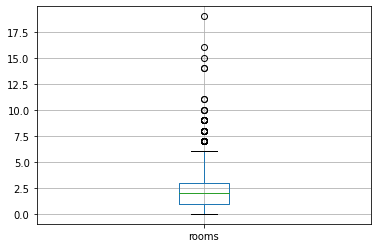

In [50]:
df.boxplot('rooms')

In [51]:
#Удалим все, где больше 9 комнат, их количество слишком мало, а данные исказят сильно
df.drop(df[df.rooms > 9].index, inplace=True)

Посмотрим столбец total_area

In [52]:
df['total_area'].describe()

count    20157.000000
mean        60.337115
std         32.805547
min         14.000000
25%         40.700000
50%         53.000000
75%         70.000000
max        517.000000
Name: total_area, dtype: float64

<AxesSubplot:>

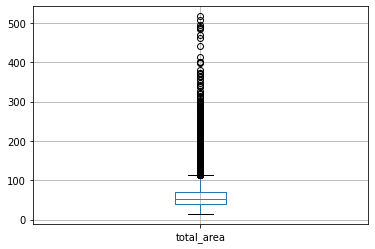

In [53]:
df.boxplot('total_area')

In [54]:
#df.loc[df['total_area'] > 300].count()
df.drop(df[df.total_area > 300].index, inplace=True) #Удалим объекты выше 300м2

In [55]:
#df.loc[((df['rooms'] > 8) &(df['last_price' ] > 3000))]

In [56]:
#df=df.drop(df[(df['rooms'] > 8) &(df['last_price' ] > 3000)].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20123 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20123 non-null  int64         
 1   last_price            20123 non-null  float64       
 2   total_area            20123 non-null  float64       
 3   first_day_exposition  20123 non-null  datetime64[ns]
 4   rooms                 20123 non-null  int64         
 5   ceiling_height        20123 non-null  float64       
 6   floors_total          20123 non-null  int64         
 7   living_area           20123 non-null  float64       
 8   floor                 20123 non-null  int64         
 9   is_apartment          20123 non-null  bool          
 10  studio                20123 non-null  bool          
 11  open_plan             20123 non-null  bool          
 12  kitchen_area          20123 non-null  float64       
 13  balcony         

In [57]:
20120/20196

0.9962368785898198

Убрали практически ровно 10%!

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Аномалии удалены верно, а вот расчеты в 57 ячейке неверные. По ним ты удалил 1% от всех данных. 20120 нужно делить на 23699 (изначальное количество строк)
</div>

### Посчитайте и добавьте в таблицу новые столбцы

Добавим вычисляемые столбцы:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

#### Добавим столбец "цена одного квадратного метра" (1m_price)

In [58]:
df['1m_price']=round(df['last_price']/df['total_area'], 2)
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,1m_price
0,20,13000.0,108.0,2019-03-07,3,2.700000,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,0,120.37
1,7,3350.0,40.4,2018-12-04,1,2.727859,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817,18603,0,0,0,0,81,82.92
2,10,5196.0,56.0,2015-08-20,2,2.727859,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92.79


#### Добавим столбцы "день недели публикации объявления" , "месяц публикации объявления", "год публикации объявления"

In [59]:
df['day_of_publishing'] = df['first_day_exposition'].dt.weekday+1 # считать понедельник нулевым непривычно, добавим +1
df['month_of_publishing'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year_of_publishing'] = pd.DatetimeIndex(df['first_day_exposition']).year
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,1m_price,day_of_publishing,month_of_publishing,year_of_publishing
0,20,13000.0,108.0,2019-03-07,3,2.700000,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,0,120.37,4,3,2019
1,7,3350.0,40.4,2018-12-04,1,2.727859,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817,18603,0,0,0,0,81,82.92,2,12,2018
2,10,5196.0,56.0,2015-08-20,2,2.727859,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92.79,4,8,2015


#### Добавим столбец тип этажа квартиры (floor_type)

In [60]:
def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
df['floor_type'] = df.apply(floor_type, axis = 1)    
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,1m_price,day_of_publishing,month_of_publishing,year_of_publishing,floor_type
0,20,13000.0,108.0,2019-03-07,3,2.700000,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,0,120.37,4,3,2019,другой
1,7,3350.0,40.4,2018-12-04,1,2.727859,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817,18603,0,0,0,0,81,82.92,2,12,2018,первый
2,10,5196.0,56.0,2015-08-20,2,2.727859,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92.79,4,8,2015,другой


#### Добавим столбец расстояние до центра города в километрах (city_center_nearest_km)

In [61]:
df['city_centers_nearest_km']=df['city_centers_nearest']/ 1000
df['city_centers_nearest_km']=df['city_centers_nearest_km'].astype(int)
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,1m_price,day_of_publishing,month_of_publishing,year_of_publishing,floor_type,city_centers_nearest_km
0,20,13000.0,108.0,2019-03-07,3,2.700000,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,0,120.37,4,3,2019,другой,16
1,7,3350.0,40.4,2018-12-04,1,2.727859,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817,18603,0,0,0,0,81,82.92,2,12,2018,первый,18
2,10,5196.0,56.0,2015-08-20,2,2.727859,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92.79,4,8,2015,другой,13


### Проведите исследовательский анализ данных


Изучим следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.
- Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.
- Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 

 
Построим гистограмму, посчитаем среднее и медиану.
Опишем, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?
Какие факторы больше всего влияют на общую (полную) стоимость объекта?
 Изучите, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.
Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.
Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.


#### Изучим следующие параметры объектов:

##### Исследуем общую площадь:

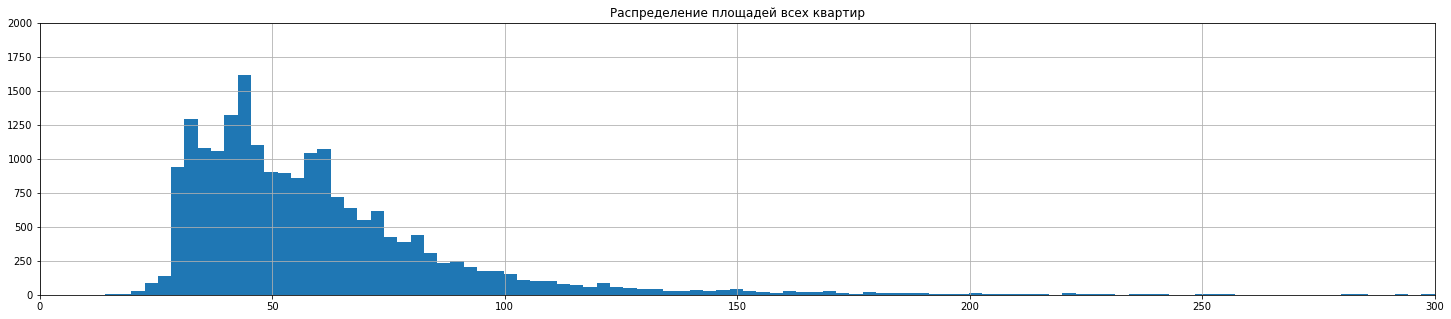

count    20123.000000
mean        59.787439
std         29.857729
min         14.000000
25%         40.600000
50%         53.000000
75%         70.000000
max        300.000000
Name: total_area, dtype: float64
Средняя площадь -  59.79 медианная -  53.0


In [62]:
df.hist('total_area', bins=100, figsize=(25,5)) 
plt.title('Распределение площадей всех квартир')
plt.axis([0, 300, 0, 2000])
plt.show()
print(df['total_area'].describe())
print('Средняя площадь - ',df['total_area'].mean().round(2), "медианная - ", df['total_area'].median())

Text(0.5, 1.0, 'Распределение площадей околотоповых квартир')

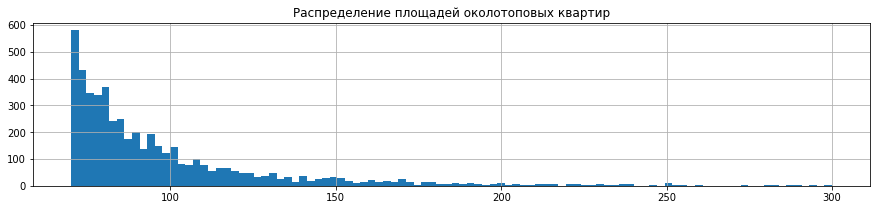

In [63]:
df.hist('total_area', bins=100, range =(70, 300), figsize=(15,3))
plt.title('Распределение площадей околотоповых квартир')

Из гистограммы видно, что в основном представлены квартиры до 40м2, средняя площадь составляет 61м2.
Медиана в районе 53, что говорит об отсутствии существенного веса выбросов. Распределение близко к нормальному.
Квартиры с площадью более 150 м2 являются редкостью. 

##### Исследуем жилую площадь:

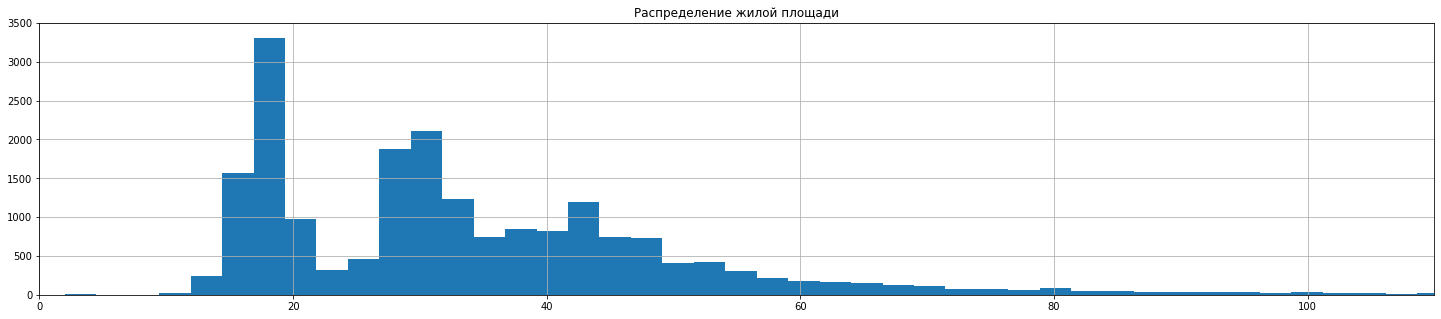

count    20123.000000
mean        34.719782
std         19.418175
min          2.000000
25%         19.065000
50%         30.500000
75%         43.000000
max        250.000000
Name: living_area, dtype: float64
Средняя площадь -  34.72 медианная -  30.5


In [64]:
df.hist('living_area', bins=100, figsize=(25,5)) 
plt.title('Распределение жилой площади')
plt.axis([0, 110, 0, 3500])
plt.show()
print(df['living_area'].describe())
print('Средняя площадь - ',df['living_area'].mean().round(2), "медианная - ", df['living_area'].median())

Text(0.5, 1.0, 'Распределение околомаксимальных жилых площадей квартир')

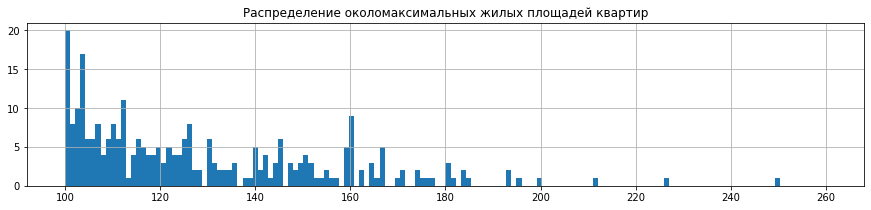

In [65]:
df.hist('living_area', bins=150, range =(100, 260), figsize=(15,3))
plt.title('Распределение околомаксимальных жилых площадей квартир')

Большее количестов объявлений имеют жилую площадь до 20м2, следующий пик - около 30м2, далее закономерный тренд на снижение предложения с увеличением жилой площади. Медиана и среднее в районе 30-35м2 - похоже на правду.

##### Исследуем площадь кухни

In [66]:
df['kitchen_area'].describe()

count    20123.000000
mean         9.702921
std          4.413504
min          0.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         62.000000
Name: kitchen_area, dtype: float64

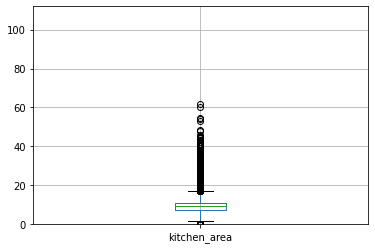

In [67]:
draw_boxplot('kitchen_area', 0, 112)

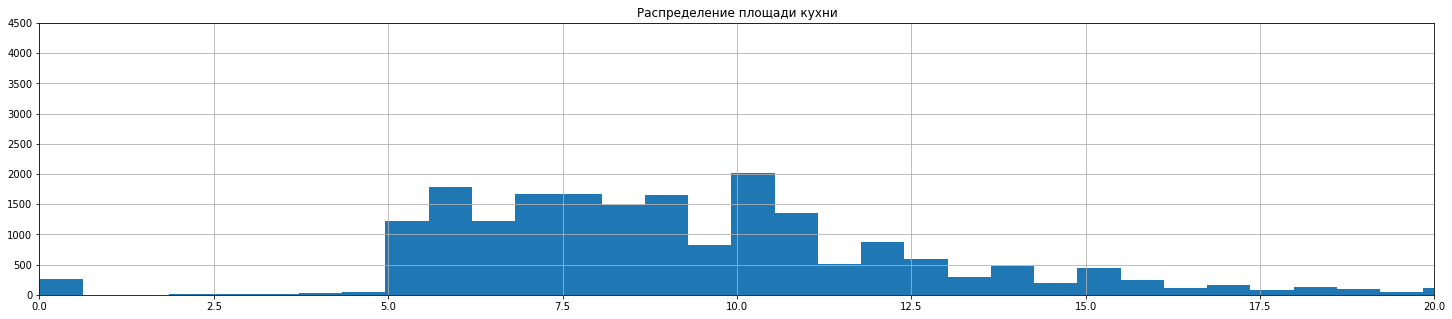

count    20123.000000
mean         9.702921
std          4.413504
min          0.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         62.000000
Name: kitchen_area, dtype: float64
Средняя площадь -  9.7 медианная -  9.0


In [68]:
df.hist('kitchen_area', bins=100, figsize=(25,5)) 
plt.title('Распределение площади кухни')
plt.axis([0, 20, 0, 4500])
# plt.xticks(np.linspace(0,11,12))
plt.show()
print(df['kitchen_area'].describe())
print('Средняя площадь - ',df['kitchen_area'].mean().round(2), "медианная - ", df['kitchen_area'].median())

Text(0.5, 1.0, 'Распределение околомаксимальных площадей кухонь')

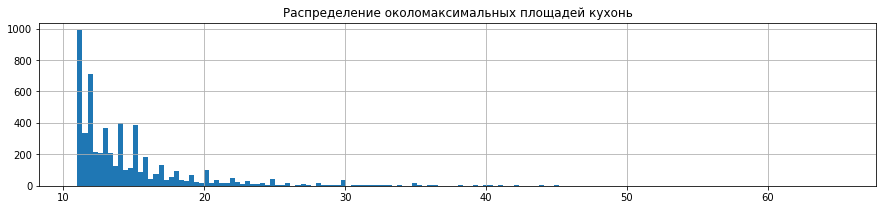

In [69]:
df.hist('kitchen_area', bins=150, range =(11, 65), figsize=(15,3))
plt.title('Распределение околомаксимальных площадей кухонь')

В среднем площадь кухни составляет 9,7м., чуть менее распространены 6-ти и 8-и метровые.

##### Исследуем цену объектов

In [70]:
# общие данные
df.last_price.describe()

count    20123.000000
mean      6119.321850
std       5865.054149
min        430.000000
25%       3450.000000
50%       4650.000000
75%       6700.000000
max      95000.000000
Name: last_price, dtype: float64

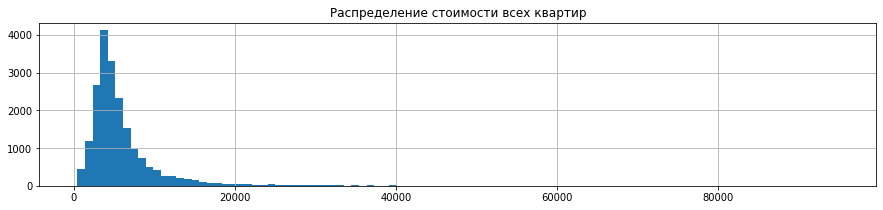

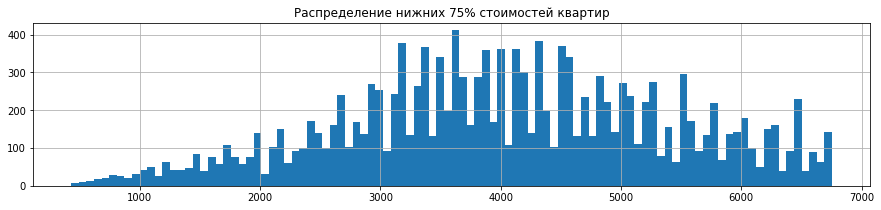

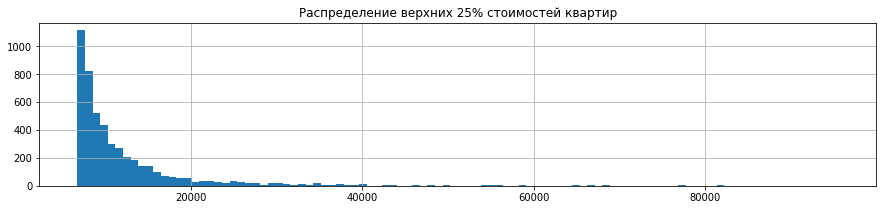

Средняя цена -  6119.32 тыс. руб. медианная -  4650.0 тыс. руб.


In [71]:
df.hist('last_price', bins=100, figsize=(15,3))
plt.title('Распределение стоимости всех квартир')
plt.show()
df.hist('last_price', bins=100, figsize=(15, 3), range=(430, 6755))
plt.title('Распределение нижних 75% стоимостей квартир')
plt.show()
# гистограмма по верхним 25%
df.hist('last_price', bins=100, figsize=(15, 3), range=(6755, 95500))
plt.title('Распределение верхних 25% стоимостей квартир')
plt.show()
print('Средняя цена - ',df['last_price'].mean().round(2), "тыс. руб.", "медианная - ", df['last_price'].median(), "тыс. руб.")

In [72]:
print(df.corr()['last_price']) #посмотрим корреляцию цены с другими параметрами.

total_images               0.130228
last_price                 1.000000
total_area                 0.759310
rooms                      0.474845
ceiling_height             0.376041
floors_total               0.037138
living_area                0.675185
floor                      0.056389
is_apartment               0.044029
studio                    -0.044392
open_plan                 -0.023292
kitchen_area               0.598781
balcony                    0.020494
airports_nearest           0.184339
city_centers_nearest      -0.053571
parks_around3000           0.279465
parks_nearest              0.179431
ponds_around3000           0.290914
ponds_nearest              0.144488
days_exposition            0.066016
1m_price                   0.740782
day_of_publishing         -0.006931
month_of_publishing        0.011408
year_of_publishing        -0.052668
city_centers_nearest_km   -0.060409
Name: last_price, dtype: float64


Высокие показатели только у производных параметров, вроде цены 1 м2 или общей площади. Неплохой вклад у располложения.
Посмотрим, как зависит стоимость квадратного метра от размера квартиры.

In [73]:
 df[df['rooms'] < 7].groupby('rooms')[['1m_price']].median().sort_values(by='1m_price', ascending=False)

,1m_price
rooms,
0,105.100
1,100.000
6,98.165
5,95.480
2,92.310
4,92.110
3,88.660


Ожидаемо, самая высокая цена за м2 в однушках, студиях и аппартаментах. 6-ти и 5-ти комнатные квартиры, видимо, имеют еще и историческую ценность и, вероятно, расположены в историческом центре, что и сказывается на цене.

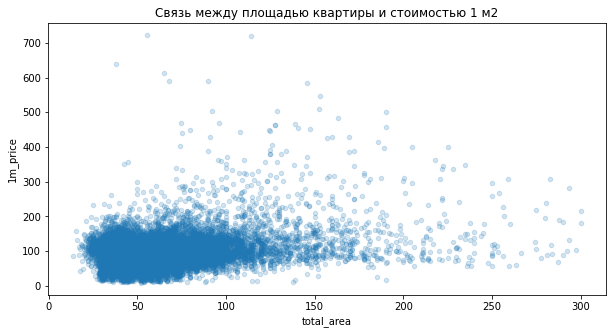

Линейная корреляция между площадью и стоимостью квадратного метра 0.259


In [74]:
#Построим диаграмму взаимного распределения площади и стоимости квартир.
df.plot.scatter('total_area', '1m_price', figsize=(10,5), alpha=0.2) 
plt.title('Связь между площадью квартиры и стоимостью 1 м2')
plt.show()
print('Линейная корреляция между площадью и стоимостью квадратного метра', round(df.total_area.corr(df['1m_price']), 3))

Можно заметить, что с увеличением площади стоимость квадратного метра немного уменьшается.Тем не менее, разброс стоимости небольшой, цена 1 м2 находится в довольно узком диапазоне.

##### Исследуем количество комнат

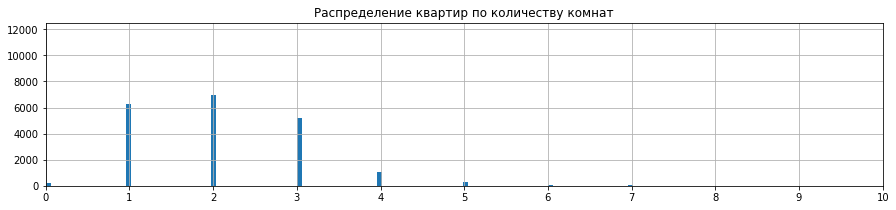

In [75]:
import numpy as np
df.hist('rooms', bins=150, figsize=(15,3)) #построим гистограмму распределения
plt.title('Распределение квартир по количеству комнат')
plt.axis([0, 10, 0, 12500])
#plt.xticks(np.arange(0,10,10))
plt.xticks(np.linspace(0,10,11))
plt.show()

In [76]:
df['rooms'].value_counts().sort_values(ascending=False) #посмотрим, какое количество комнат самое распространенное

2    6996
1    6259
3    5225
4    1047
5     269
0     193
6      84
7      41
8       6
9       3
Name: rooms, dtype: int64

Выводы и гистограммы, и подсчета очевидны - больше всего на рынке 2-ух комнатных квартир, следом идут 1 и 3-х комнатные. 5, 6, 7 и 8 - скорее редкость, остальные - в рамках погрешности, часто в единственном экземпляре.

##### Исследуем высоту потолков

count    20123.000000
mean         2.721799
std          0.224895
min          1.000000
25%          2.600000
50%          2.727859
75%          2.727859
max          8.300000
Name: ceiling_height, dtype: float64

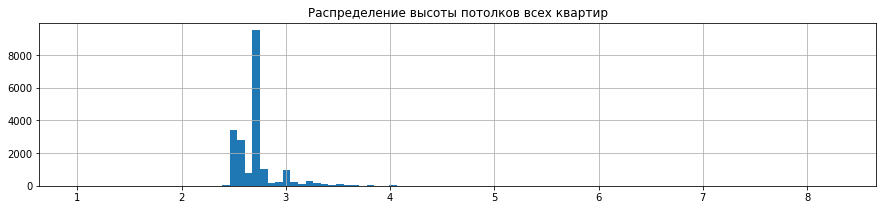

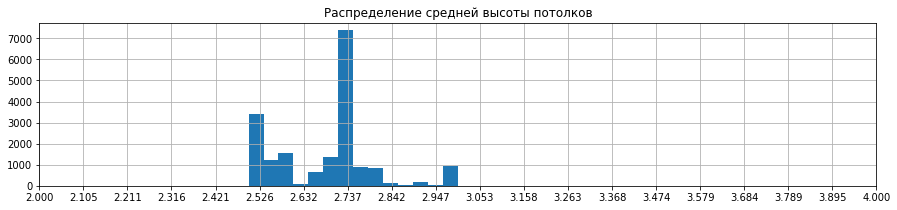

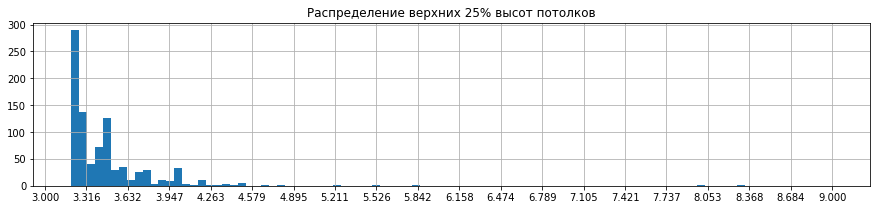

In [77]:
 # общие данные
display(df.ceiling_height.describe())
# гистограмма по всем объектам
df.hist('ceiling_height', bins=100, figsize=(15, 3))
plt.title('Распределение высоты потолков всех квартир')
plt.show()
# гистограмма по средним 
df.hist('ceiling_height', bins=14, figsize=(15, 3), range=(2.5, 3))
plt.title('Распределение средней высоты потолков')
plt.xticks(np.linspace(2,4,20))
plt.show()
# гистограмма по верхним 
df.hist('ceiling_height', bins=96, figsize=(15, 3), range=(3.2, 9))
plt.title('Распределение верхних 25% высот потолков')
plt.xticks(np.linspace(3,9,20))
plt.show()

In [78]:
df['ceiling_height'].value_counts().sort_values(ascending=False) #посмотрим, какая высота самая распространенная

2.727859    7291
2.500000    3250
2.600000    1494
2.700000    1353
3.000000     956
2.550000     927
2.800000     822
2.750000     750
2.650000     610
3.200000     240
3.100000     177
2.900000     146
3.300000     118
2.560000     117
3.500000     105
2.570000      94
2.850000      88
2.540000      78
2.520000      76
2.640000      71
3.400000      71
2.530000      63
2.580000      59
2.770000      57
2.760000      53
3.150000      49
2.780000      45
2.950000      43
3.050000      43
2.670000      35
4.000000      34
3.250000      33
2.730000      32
2.510000      29
3.600000      29
2.720000      26
3.700000      25
2.740000      21
2.680000      20
2.400000      20
3.800000      19
2.840000      17
2.820000      17
3.120000      16
2.660000      15
3.550000      15
3.350000      14
2.450000      14
2.590000      13
2.830000      13
2.620000      13
3.080000      13
2.630000      12
2.880000      12
2.710000      11
3.180000      11
3.070000      10
3.130000      10
3.900000      

<AxesSubplot:xlabel='ceiling_height', ylabel='total_area'>

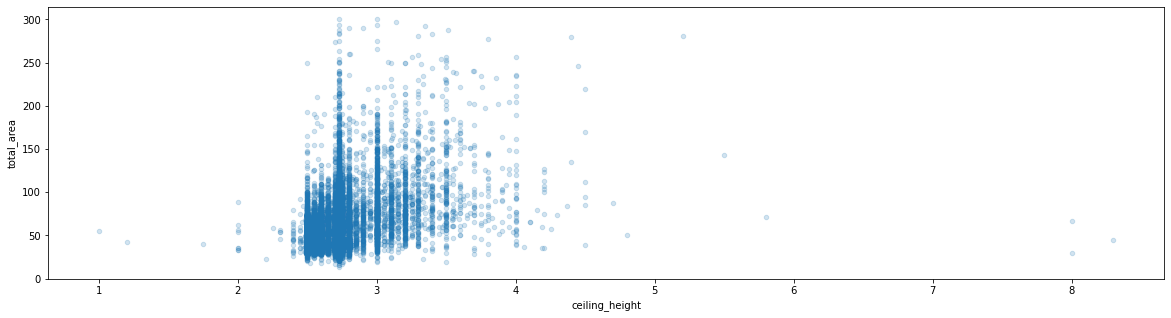

In [79]:
df.plot.scatter('ceiling_height','total_area', figsize=(20,5), alpha=0.2) #посмотрим на распределение значений

Большинство значений у нас ожидаемо 2.72, поскольку выше заполняли пропуски средним. Данный столбец - один из лидеров по пропускам. Можем сделать обоснованное предположение, что большинство потолков имеют высоту 2.5 м. Следующие по количеству также ожидаемо - 3 м. Основная масса значений находится в диапазоне 2.5 м. - 4 м. Остальные значения могут представлять собой редкие объекты, возможно, двухуровневые квартиры или усадьбы.

##### Исследуем этаж квартиры

In [80]:
df['floor'].value_counts().sort_values(ascending=False) #посмотрим, какая высота самая распространенная

2     2849
3     2651
1     2507
4     2462
5     2275
6     1098
7     1048
8      927
9      903
10     574
11     426
12     425
13     291
14     281
15     270
16     250
17     183
18     131
19     118
22      94
21      93
20      84
23      80
24      46
25      30
26      17
27       6
32       1
33       1
29       1
30       1
Name: floor, dtype: int64

count    20123.000000
mean         2.721799
std          0.224895
min          1.000000
25%          2.600000
50%          2.727859
75%          2.727859
max          8.300000
Name: ceiling_height, dtype: float64

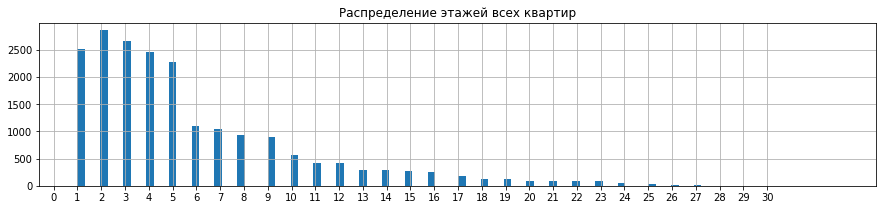

In [81]:
# общие данные
display(df.ceiling_height.describe())
# гистограмма по всем объектам
df.hist('floor', bins=100, figsize=(15, 3))
plt.title('Распределение этажей всех квартир')
plt.xticks(np.linspace(0,30,31))
plt.show()

Большинство квартир расположены на 2-м этаже, далее с небольшим отрывом следуют 3-ий и 1-ый. Большая часть квартир  - 1-10 этажи, что соответствует реальности, поскольку основная масса застройки - историческая, либо советская, а значит, и большинство квартир будут в этом диапазоне. Именно эти квартиры в основном и продают на сервисах вроде Яндекс.Недвижимости.

##### Исследуем тип этажа квартиры

In [82]:
df['floor_type'].value_counts().sort_values(ascending=False)

другой       14730
последний     2886
первый        2507
Name: floor_type, dtype: int64

In [83]:
print('Категория "другой" составляет', round(((14722/20196)*100),2), '%')
print('Категория "первый" составляет', round(((2511/20196)*100),2), '%')
print('Категория "последний" составляет', round(((2913/20196)*100),2), '%')

Категория "другой" составляет 72.9 %
Категория "первый" составляет 12.43 %
Категория "последний" составляет 14.42 %


73% квартир в объявлениях находятся не на первом и не на последнем этаже. На них рамположено примерно равное количество квартир - ок.13%-14%.

##### Исследуем общее количество этажей в доме

In [84]:
df['floors_total'].describe()

count    20123.000000
mean        10.433236
std          6.429014
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64

In [85]:
df['floors_total'].value_counts().sort_values(ascending=False) # отсортируем

5     5108
9     3434
16    1175
12    1166
10    1011
4     1011
25     843
6      755
17     699
3      567
7      485
14     468
18     375
24     362
2      333
8      314
15     308
23     279
19     252
22     225
20     214
13     172
11     170
27     133
21     120
26      87
28      20
1       18
35      14
36       2
37       1
60       1
33       1
Name: floors_total, dtype: int64

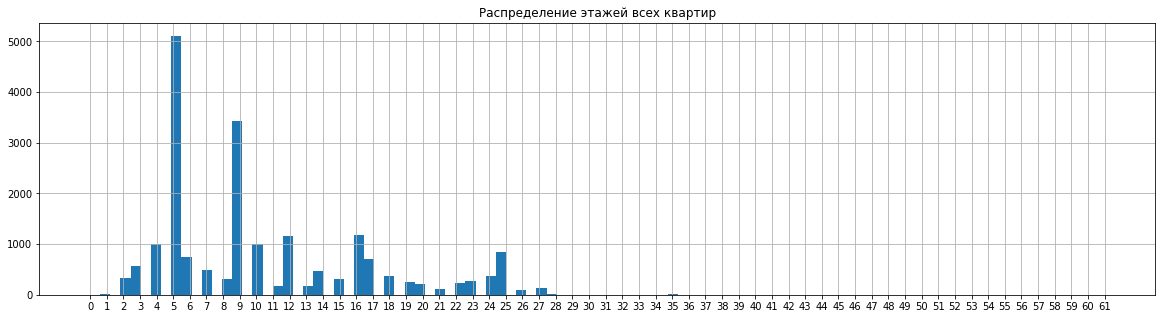

In [86]:
# гистограмма по всем объектам
df.hist('floors_total', bins=100, figsize=(20, 5), range=(0, 61))
plt.title('Распределение этажей всех квартир')
plt.xticks(np.linspace(0,61,62))
plt.show()

Большинство домов имеют 5 и 9 этажей, что также полностью соответствуют действительности и специфики застройки Петербурга.

##### Исследуем расстояние до центра города в метрах

In [87]:
# общие данные
display(df.city_centers_nearest.describe())

count    20123.000000
mean     11056.140486
std       9717.616308
min          0.000000
25%       2709.000000
50%      11409.000000
75%      15245.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

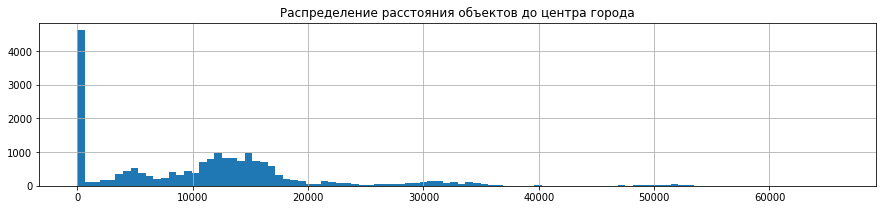

In [88]:
# гистограмма по всем объектам
df.hist('city_centers_nearest', bins=100, figsize=(15, 3))
plt.title('Распределение расстояния объектов до центра города')
plt.show()

Нулевых значений слишком много, теперь вызывает сомнение их нахождение в выборке. 
Создадим новый срез данных,выбросив нулевые значения.

In [89]:
centers = df[df.city_centers_nearest != 0 ] #создаем срез данных
centers.info()                               #проверяем

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15547 entries, 0 to 23694
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             15547 non-null  int64         
 1   last_price               15547 non-null  float64       
 2   total_area               15547 non-null  float64       
 3   first_day_exposition     15547 non-null  datetime64[ns]
 4   rooms                    15547 non-null  int64         
 5   ceiling_height           15547 non-null  float64       
 6   floors_total             15547 non-null  int64         
 7   living_area              15547 non-null  float64       
 8   floor                    15547 non-null  int64         
 9   is_apartment             15547 non-null  bool          
 10  studio                   15547 non-null  bool          
 11  open_plan                15547 non-null  bool          
 12  kitchen_area             15547 n

count    20123.000000
mean     11056.140486
std       9717.616308
min          0.000000
25%       2709.000000
50%      11409.000000
75%      15245.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

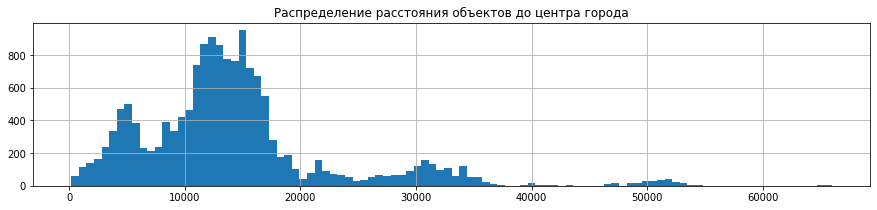

In [90]:
# общие данные
display(df.city_centers_nearest.describe())
# построим гистограмму по срезу
centers.hist('city_centers_nearest', bins=100, figsize=(15, 3))
plt.title('Распределение расстояния объектов до центра города')
plt.show()

Больше всего объектов в диапазоне 10-20 км. Максимально удаленный объект - ок. 70км от ближайшего центра.

##### Исследуем расстояние до ближайшего аэропорта

In [91]:
# общие данные
display(df.airports_nearest.describe())

count    20123.000000
mean     22128.984197
std      16375.463722
min          0.000000
25%      10636.500000
50%      21850.000000
75%      34324.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [92]:
df['airports_nearest'].value_counts().sort_values(ascending=False)

0        4594
37434      55
21928      29
37407      26
44870      23
39140      23
31744      22
21793      22
19499      20
44382      20
23639      19
39946      19
51333      18
39141      18
30073      17
39393      17
18748      16
21460      16
27102      16
23604      16
43074      16
37412      16
18732      16
12678      16
23609      15
48847      15
23617      15
11405      15
28554      15
7026       14
34967      14
13461      14
27314      13
18995      13
20028      13
17720      13
13908      12
22077      12
46530      12
39357      12
32106      12
9354       12
35257      12
53148      11
23756      11
37625      11
14809      11
32746      11
17950      11
36897      11
35847      11
28959      11
37948      11
52212      11
14184      11
16087      11
18867      11
32158      11
39180      11
35129      11
14768      11
16248      10
43157      10
31118      10
37636      10
56588      10
18012      10
36533      10
10663      10
16057      10
13943      10
30894 

In [93]:
print('Аэропортов нет рядом у ',round(((4597/20196)*100),2) ,'% объектов')

Аэропортов нет рядом у  22.76 % объектов


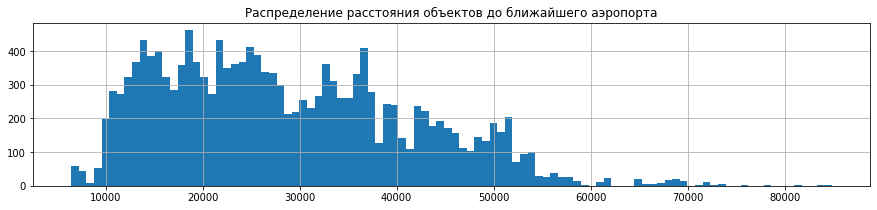

In [94]:
airports = df[df.airports_nearest != 0 ] #создаем срез данных
#airports.info()                               #проверяем
airports.hist('airports_nearest', bins=100, figsize=(15, 3))
plt.title('Распределение расстояния объектов до ближайшего аэропорта')
plt.show()

у  22.76 % объектов рядом отсутствует аэропорт. Основная масса объектов имеет аэропорт в пределах 10-50 км.

##### Исследуем расстояние до ближайшего парка

In [95]:
# общие данные
display(df.parks_nearest.describe())

count    20123.000000
mean       166.629230
std        301.193117
min          0.000000
25%          0.000000
50%          0.000000
75%        304.000000
max       3190.000000
Name: parks_nearest, dtype: float64

In [96]:
df['parks_nearest'].value_counts().sort_values(ascending=False)

0       13225
441        59
456        37
173        33
392        31
471        27
288        26
447        26
541        25
485        25
458        24
164        23
679        23
537        22
315        22
433        22
192        21
398        21
413        21
570        21
223        21
532        20
645        20
365        20
842        20
310        20
394        20
212        20
215        20
674        20
194        20
367        20
497        20
684        20
592        20
2102       19
350        19
522        19
526        19
630        19
401        19
483        19
604        19
417        18
601        18
586        18
572        18
428        18
620        18
241        18
515        18
460        17
637        17
420        17
172        17
529        17
493        17
498        17
470        17
51         17
257        17
185        17
343        16
156        16
284        16
226        16
672        16
474        16
648        16
482        16
721        16
377   

In [97]:
print('Парков нет рядом у ',round(((13248/20196)*100),2) ,'% объектов')

Парков нет рядом у  65.6 % объектов


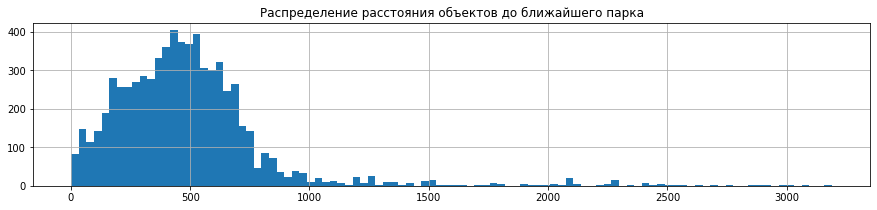

In [98]:
parks = df[df.parks_nearest != 0 ] #создаем срез без 0 значений
parks.hist('parks_nearest', bins=100, figsize=(15, 3))
plt.title('Распределение расстояния объектов до ближайшего парка')
plt.show()

Парков нет рядом у  65.6 % объектов. Основная масса объектов, имеющих рядом парк, находится от него на расстоянии 0-1 км.

##### Исследуем день и месяц публикации объявления.

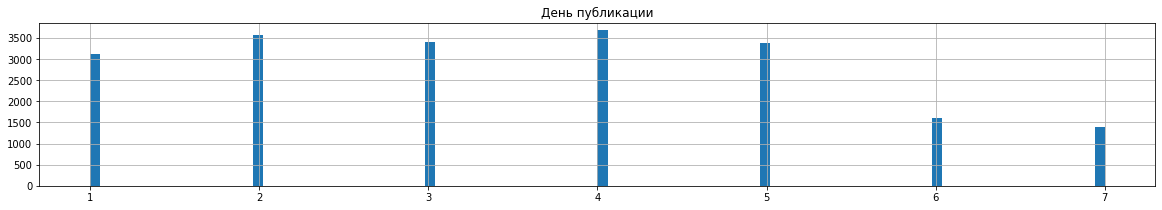

In [99]:
df.hist('day_of_publishing', bins=100, figsize=(20, 3)) #Построим гистограмму
plt.title('День публикации')
plt.show()

In [100]:
df['day_of_publishing'].value_counts().sort_values(ascending=False) # Отсортируем значения


4    3675
2    3577
3    3391
5    3383
1    3111
6    1594
7    1392
Name: day_of_publishing, dtype: int64

Больше всего объявлений было размещено в четверг, меньше всего - в воскресенье

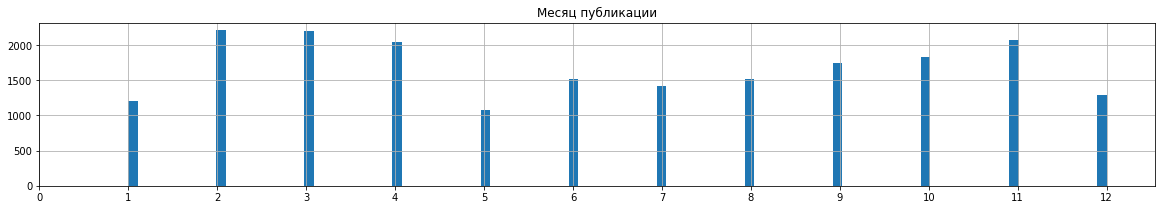

In [101]:
df.hist('month_of_publishing', bins=100, figsize=(20, 3)) #Построим гистограмму
plt.title('Месяц публикации')
plt.xticks(np.linspace(0,12,13))
plt.show()

In [102]:
df['month_of_publishing'].value_counts().sort_values(ascending=False) 

2     2207
3     2194
11    2071
4     2047
10    1835
9     1750
8     1516
6     1513
7     1414
12    1293
1     1208
5     1075
Name: month_of_publishing, dtype: int64

Больше всего объявлений размещается в конце зимы - начале весны, это же время считается лучшим для продажи квартиры.
Лидер по количеству объявлений - февраль, меньше всего опубликовано было в мае.

#### Исследуем, как быстро продавались квартиры

In [103]:
df['days_exposition'].describe()

count    20123.000000
mean       158.515331
std        215.316088
min          0.000000
25%         21.000000
50%         76.000000
75%        202.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [104]:
df['days_exposition'].value_counts().sort_values(ascending=False)

0       2810
45       510
60       338
7        207
30       192
4        157
3        140
90       138
5        133
14       126
20       124
9        123
8        118
18       116
10       116
13       115
11       113
22       113
28       113
6        110
15       110
21       105
17       104
19       104
29       104
35       101
54       100
24       100
23        99
34        97
12        96
27        95
74        95
44        93
89        90
26        88
61        88
42        87
63        86
16        83
67        81
32        81
59        81
37        81
52        78
46        77
33        77
25        74
92        74
53        73
43        73
40        73
64        72
36        71
38        70
84        70
48        70
56        66
47        66
55        66
62        65
75        64
116       64
66        64
71        63
58        63
85        62
91        62
57        62
41        62
68        62
70        62
113       61
72        60
69        60
73        60
31        60

In [105]:
print('0 дней находились в продаже ',round(((2822/20196)*100),2) ,'% объектов') 

0 дней находились в продаже  13.97 % объектов


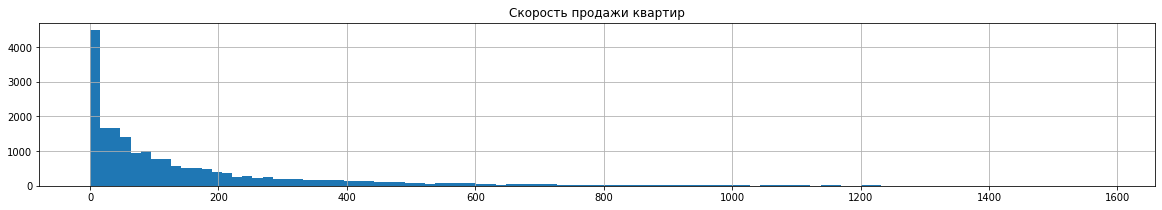

In [106]:
df.hist('days_exposition', bins=100, figsize=(20, 3))#Построим гистограмму
plt.title('Скорость продажи квартир')
plt.show()

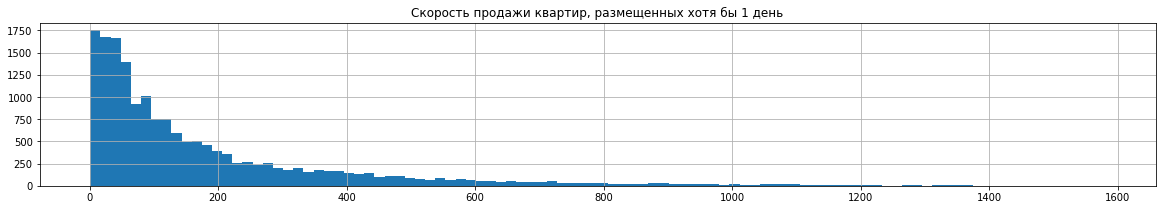

Средний срок нахождения -  159.0 дней. медианный -  76.0 дней.


In [107]:
days = df[df.days_exposition != 0 ]
days.hist('days_exposition', bins=100, figsize=(20, 3))#Построим гистограмму
plt.title('Скорость продажи квартир, размещенных хотя бы 1 день')
#plt.xticks(np.linspace(0,50,51))
plt.show()
print('Средний срок нахождения - ',df['days_exposition'].mean().round(), "дней.", 
      "медианный - ", df['days_exposition'].median(), "дней.")

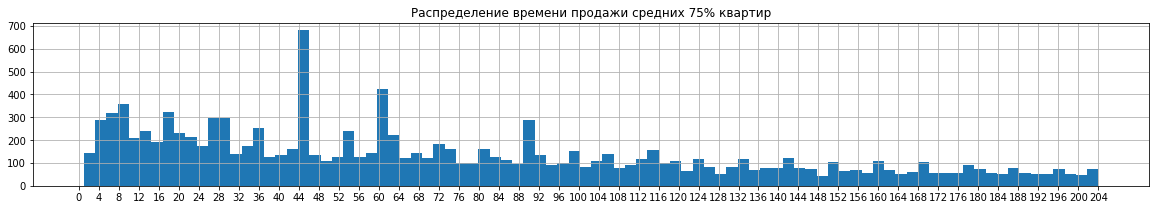

In [108]:
df.hist('days_exposition', bins=90, figsize=(20, 3), range=(1, 204)) #построим гистограмму
plt.title('Распределение времени продажи средних 75% квартир')
plt.xticks(np.linspace(0,204,52))
plt.show()

In [109]:
 # группировка по длительности - найдем пики на графике
df.groupby('days_exposition')['first_day_exposition'].count().sort_values(ascending=False).head(10)

days_exposition
0     2810
45     510
60     338
7      207
30     192
4      157
3      140
90     138
5      133
14     126
Name: first_day_exposition, dtype: int64

Медианный срок выглядит более близким к реальности в качестве среднего, особенно учитыывая вес выбросов. Обычно около 2.5 мес. и требуется на продажу. На гситограмме можем видеть крупный спад количества объявлений по прошествии 30-50 дней.

Внезапные пики возникают на 45 и 60 днях. Возможно, это вызвано особенностями платформы размещения объявлений и их автоматическим снятием с продажи после указанных сроков. Дальше идут неделя, 30 и 90 дней - очень "ровные" числа, возможно, также связанные с правилами платформы.

#### Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта

Изучим влияние 
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);

In [110]:
#для начала посмотрим корреляцию цены с другими параметрами.
print(df.corr()['last_price'].sort_values(ascending=False)) 

last_price                 1.000000
total_area                 0.759310
1m_price                   0.740782
living_area                0.675185
kitchen_area               0.598781
rooms                      0.474845
ceiling_height             0.376041
ponds_around3000           0.290914
parks_around3000           0.279465
airports_nearest           0.184339
parks_nearest              0.179431
ponds_nearest              0.144488
total_images               0.130228
days_exposition            0.066016
floor                      0.056389
is_apartment               0.044029
floors_total               0.037138
balcony                    0.020494
month_of_publishing        0.011408
day_of_publishing         -0.006931
open_plan                 -0.023292
studio                    -0.044392
year_of_publishing        -0.052668
city_centers_nearest      -0.053571
city_centers_nearest_km   -0.060409
Name: last_price, dtype: float64


Итак, на первый взгляд самыый большой вклад вносят следующие параметры:

- total_area                 0.698283
- living_area                0.610268
- kitchen_area               0.553022
- rooms                      0.393048
- ceiling_height             0.312240
- ponds_around3000           0.222351
- parks_around3000           0.205405

*Самая сильная корреляция у 1m_price, но ее мы не учитываем, поскольку это производный от стоимости параметр, а не наоборот

In [111]:
df['total_area'].describe()

count    20123.000000
mean        59.787439
std         29.857729
min         14.000000
25%         40.600000
50%         53.000000
75%         70.000000
max        300.000000
Name: total_area, dtype: float64

##### Изучим влияние общей площади на стоимость

In [112]:
a=df[df['total_area'] < 70].pivot_table(   #составим сводную таблицу
               index=["total_area"],
               values=["last_price"],
               #columns=["last_price"],
               aggfunc=['median']
              )
a

,median
,last_price
total_area,
14.00,1190.0000
15.50,2450.0000
16.00,2100.0000
17.00,1700.0000
18.00,1335.0000
18.40,2200.0000
18.80,1350.0000
19.00,2220.0000


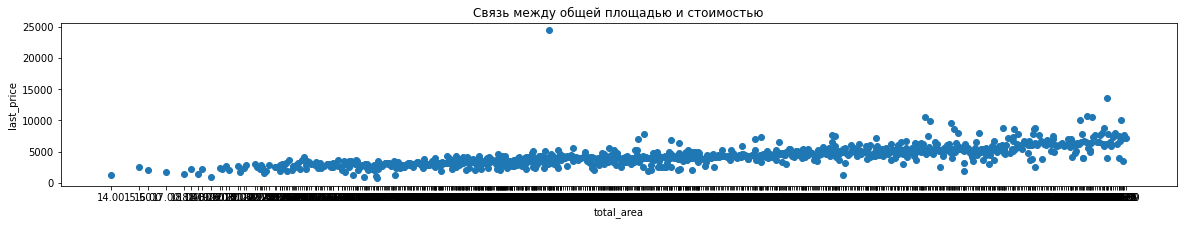

In [113]:
plt.figure(figsize=(20, 3))
plt.scatter(a.index, a)
#plt.grid()
plt.xticks(a.index)
plt.xlabel('total_area')
plt.ylabel('last_price')
plt.title('Связь между общей площадью и стоимостью')
plt.show()

Ожидаемо общая площадь прямо влияет на стоимость. Чем она больше - тем стоимость выше.

##### Изучим влияние жилой площади на стоимость

In [114]:
df['living_area'].describe()

count    20123.000000
mean        34.719782
std         19.418175
min          2.000000
25%         19.065000
50%         30.500000
75%         43.000000
max        250.000000
Name: living_area, dtype: float64

In [115]:
living_area=df[df['living_area'] < 50].pivot_table(
               index=["living_area"],
               values=["last_price"],
               #columns=["last_price"],
               aggfunc=['median']
              )
living_area

,median
,last_price
living_area,
2.000000,4340.0000
3.000000,34715.0000
5.000000,2680.0000
5.400000,6100.0000
8.300000,4000.0000
9.000000,4800.0000
10.000000,3225.0000
10.500000,1980.0000


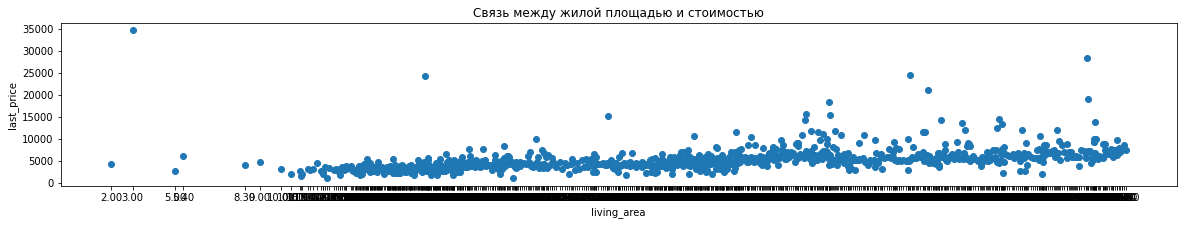

In [116]:
plt.figure(figsize=(20, 3))
plt.scatter(living_area.index, living_area)
#plt.grid()
plt.xticks(living_area.index)
plt.xlabel('living_area')
plt.ylabel('last_price')
plt.title('Связь между жилой площадью и стоимостью')
plt.show()

Опять же, чем выше площадь, тем выше стоимость, все логично

##### Изучим влияние  площади кухни  на стоимость

In [117]:
df['kitchen_area'].describe()

count    20123.000000
mean         9.702921
std          4.413504
min          0.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         62.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:xlabel='kitchen_area'>

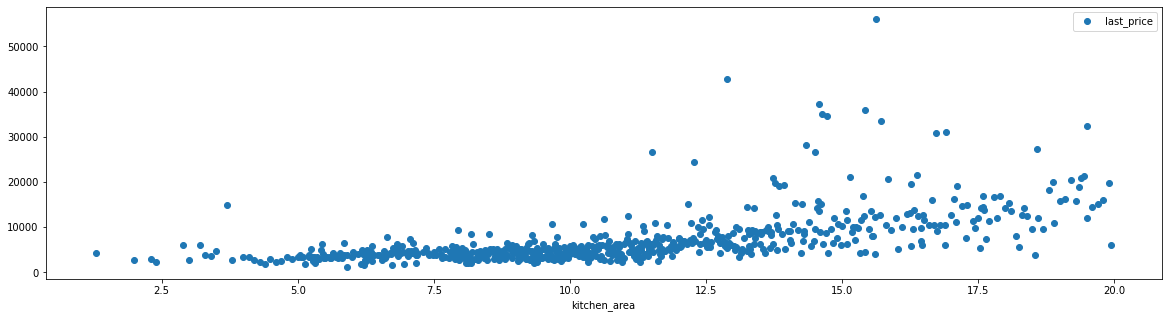

In [118]:
df.query('1<kitchen_area<20').pivot_table(index='kitchen_area', values='last_price').plot(style='o', figsize=(20, 5))


Чем выше площадь кухни - тем выше стоимость (неслучайно коэффициент корреляции более 55%)

##### Изучим влияние количества комнат на стоимость

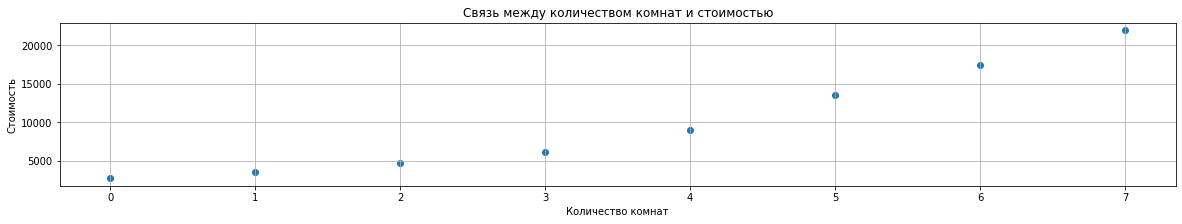

In [119]:
room_price = df[df['rooms'] < 8].pivot_table(index='rooms', values='last_price', aggfunc='median') #составим сводную таблицу
plt.figure(figsize=(20, 3))
plt.scatter(room_price.index, room_price)
plt.grid()
plt.xticks(room_price.index)
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость')
plt.title('Связь между количеством комнат и стоимостью')
plt.show()

Чем больше комнат - тем выше стоимость (если не учитывать квартиры от 7 комнат - как мы помним, таких в нашем датасете совсем мало и данные по ним слишком узкие).

##### Изучим влияние категории этажа  на стоимость

<AxesSubplot:xlabel='floor_type'>

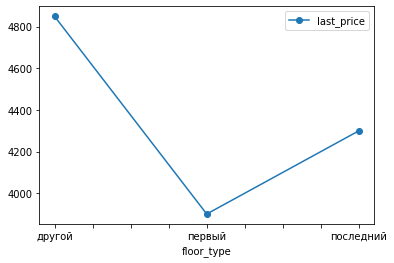

In [120]:
# Оценим зависимость цены м2 от того, на каком этаже расположена квартира
df.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(style='o-')

Квартиры на первом и последнем этаже дешевле чем на других этажах. Также на первом этаже цена существенно ниже чем на последнем.

##### Изучим влияние даты размещения  на стоимость

<AxesSubplot:xlabel='day_of_publishing'>

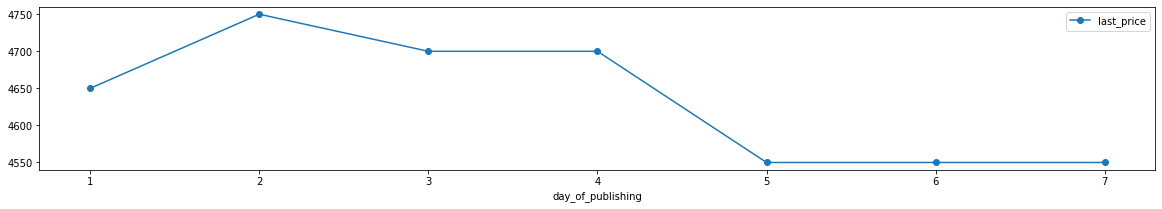

In [121]:
# Оценим зависимость цены от дня размещения объявления, построив график
df.pivot_table(index='day_of_publishing', values='last_price', aggfunc='median').plot(style='o-', figsize=(20, 3))

Наибольшее значение цены м2 у объявлений, выставленных в середине недели, наименьшая - у объявлений выставленных в пятницу и воскресенье.

<AxesSubplot:xlabel='month_of_publishing'>

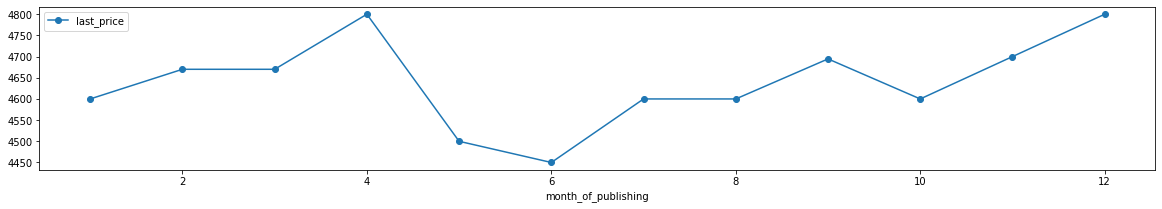

In [122]:
# Оценим зависимость цены от месяца размещения объявления, построив график
df.pivot_table(index='month_of_publishing', values='last_price', aggfunc='median').plot(style='o-', figsize=(20, 3))

Наибольшее значение цены м2 у объявлений, выставленных в апреле и декабре, наименьшая - у объявлений выставленных в мае и июне.



<AxesSubplot:xlabel='year_of_publishing'>

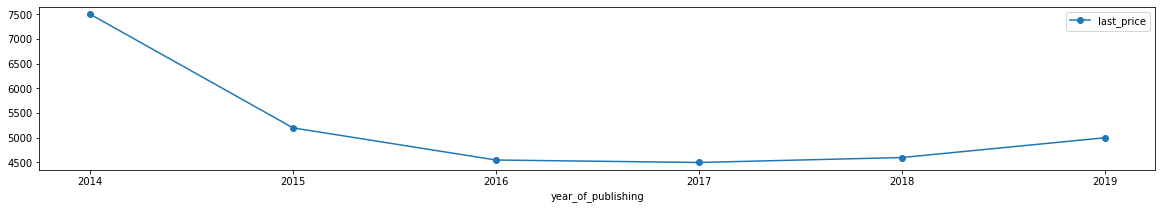

In [123]:
# Оценим зависимость цены от года размещения объявления, построив график
df.pivot_table(index='year_of_publishing', values='last_price', aggfunc='median').plot(style='o-', figsize=(20, 3))

Наибольшее значение цены м2 у объявлений, выставленных в 2014, затем падает до 2017г, далее растет до 2019г.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [124]:
# Выберем 10 населённых пунктов с наибольшим числом объявлений
locality=df['locality_name'].value_counts().sort_values(ascending=False).head(10)
display(locality)

Санкт-Петербург      13455
поселок Мурино         403
поселок Шушары         367
Всеволожск             344
Колпино                316
Пушкин                 312
Гатчина                288
поселок Парголово      225
деревня Кудрово        210
Выборг                 196
Name: locality_name, dtype: int64

In [125]:
# Посчитаем среднюю цену м2 в этих населённых пунктах, выделим пункты с самой высокой и низкой стоимостью жилья.
df.query('locality_name in @locality.index').pivot_table(index='locality_name', values=['last_price','1m_price'], aggfunc='mean').sort_values('last_price', ascending=False)
#.plot(kind='bar')


,1m_price,last_price
locality_name,,
Санкт-Петербург,111.564951,7406.749614
Пушкин,102.284038,6215.650872
поселок Парголово,88.227111,4605.157596
деревня Кудрово,92.682190,4364.075581
поселок Шушары,77.792888,4164.205174
Колпино,74.998987,3871.487339
Всеволожск,68.578372,3817.944724
поселок Мурино,84.894615,3787.844901
Гатчина,68.519062,3487.636667


Самая высокая средняя цена за 1м2 среди 10-ти самых распространненных населенных пунктов в Санкт-Петербурге и Пушкине, самая низкая - в Выборге.

#### Изучим, как стоимость объектов зависит от расстояния до центра города в Санкт-Петербурге.

In [126]:
df_spb=df[df['locality_name'] == 'Санкт-Петербург']
df_spb.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,1m_price,day_of_publishing,month_of_publishing,year_of_publishing,floor_type,city_centers_nearest_km
0,20,13000.0,108.0,2019-03-07,3,2.700000,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,0,120.37,4,3,2019,другой,16
2,10,5196.0,56.0,2015-08-20,2,2.727859,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92.79,4,8,2015,другой,13
7,5,7915.0,71.6,2019-04-18,2,2.727859,24,30.5,22,False,False,False,18.9,2,Санкт-Петербург,23982,11634,0,0,0,0,0,110.54,4,4,2019,другой,11
9,18,5400.0,61.0,2017-02-26,3,2.500000,9,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898,15008,0,0,0,0,289,88.52,7,2,2017,другой,15
10,5,5050.0,39.6,2017-11-16,1,2.670000,12,20.3,3,False,False,False,8.5,0,Санкт-Петербург,38357,13878,1,310,2,553,137,127.53,4,11,2017,другой,13
15,16,4650.0,39.0,2017-11-18,1,2.727859,14,20.5,5,False,False,False,7.6,1,Санкт-Петербург,12900,14259,1,590,1,296,19,119.23,6,11,2017,другой,14
16,11,6700.0,82.0,2017-11-23,3,3.050000,5,55.6,1,False,False,False,9.0,0,Санкт-Петербург,22108,10698,3,420,0,0,397,81.71,4,11,2017,первый,10
18,8,3250.0,31.0,2017-01-27,1,2.500000,5,19.4,2,False,False,False,5.6,1,Санкт-Петербург,44060,10842,1,759,0,0,168,104.84,5,1,2017,другой,10
19,16,14200.0,121.0,2019-01-09,3,2.750000,16,76.0,8,False,False,False,12.0,0,Санкт-Петербург,38900,12843,0,0,0,0,97,117.36,3,1,2019,другой,12
21,13,3200.0,31.6,2018-03-14,1,2.727859,5,16.9,2,False,False,False,5.7,1,Санкт-Петербург,36064,9722,1,248,0,0,310,101.27,3,3,2018,другой,9


In [127]:
# посчитаем среднюю цену для каждого километра.
df_spb['price_km'] = df_spb['last_price'] / df_spb['city_centers_nearest_km'].dropna().astype(int)
df_spb.head(10)

/tmp/ipykernel_174/4092800002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spb['price_km'] = df_spb['last_price'] / df_spb['city_centers_nearest_km'].dropna().astype(int)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,1m_price,day_of_publishing,month_of_publishing,year_of_publishing,floor_type,city_centers_nearest_km,price_km
0,20,13000.0,108.0,2019-03-07,3,2.700000,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,0,120.37,4,3,2019,другой,16,812.500000
2,10,5196.0,56.0,2015-08-20,2,2.727859,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92.79,4,8,2015,другой,13,399.692308
7,5,7915.0,71.6,2019-04-18,2,2.727859,24,30.5,22,False,False,False,18.9,2,Санкт-Петербург,23982,11634,0,0,0,0,0,110.54,4,4,2019,другой,11,719.545455
9,18,5400.0,61.0,2017-02-26,3,2.500000,9,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898,15008,0,0,0,0,289,88.52,7,2,2017,другой,15,360.000000
10,5,5050.0,39.6,2017-11-16,1,2.670000,12,20.3,3,False,False,False,8.5,0,Санкт-Петербург,38357,13878,1,310,2,553,137,127.53,4,11,2017,другой,13,388.461538
15,16,4650.0,39.0,2017-11-18,1,2.727859,14,20.5,5,False,False,False,7.6,1,Санкт-Петербург,12900,14259,1,590,1,296,19,119.23,6,11,2017,другой,14,332.142857
16,11,6700.0,82.0,2017-11-23,3,3.050000,5,55.6,1,False,False,False,9.0,0,Санкт-Петербург,22108,10698,3,420,0,0,397,81.71,4,11,2017,первый,10,670.000000
18,8,3250.0,31.0,2017-01-27,1,2.500000,5,19.4,2,False,False,False,5.6,1,Санкт-Петербург,44060,10842,1,759,0,0,168,104.84,5,1,2017,другой,10,325.000000
19,16,14200.0,121.0,2019-01-09,3,2.750000,16,76.0,8,False,False,False,12.0,0,Санкт-Петербург,38900,12843,0,0,0,0,97,117.36,3,1,2019,другой,12,1183.333333
21,13,3200.0,31.6,2018-03-14,1,2.727859,5,16.9,2,False,False,False,5.7,1,Санкт-Петербург,36064,9722,1,248,0,0,310,101.27,3,3,2018,другой,9,355.555556


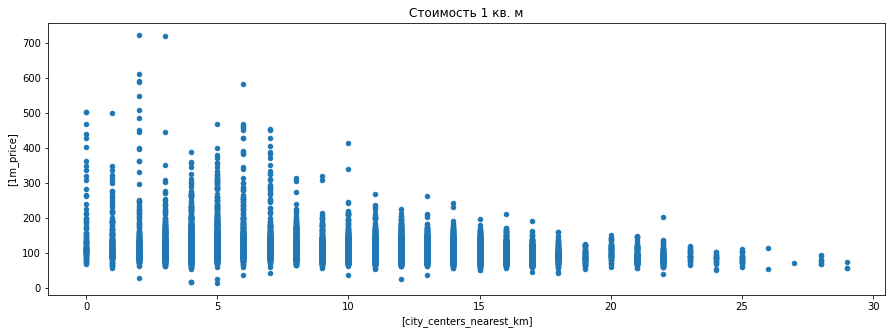

In [128]:
df_spb.plot.scatter(['city_centers_nearest_km'], ['1m_price'], figsize=(15,5)) #Построим гистограмму
plt.title('Стоимость 1 кв. м')
plt.show()

In [129]:
#строим сводную таблицу по медианным значениям:
df.pivot_table(index='city_centers_nearest_km', values='1m_price', aggfunc='median')

,1m_price
city_centers_nearest_km,
0,59.800
1,117.450
2,111.730
3,107.020
4,121.710
5,122.495
6,124.485
7,123.945
8,112.900


In [130]:
df.loc[df['city_centers_nearest_km'] == 42] #посмотрим, что за скачок на 42 км:

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,1m_price,day_of_publishing,month_of_publishing,year_of_publishing,floor_type,city_centers_nearest_km
2454,12,28000.0,160.0,2016-10-24,3,3.000000,2,92.00,2,False,False,False,30.00,4,поселок Репино,61484,42583,0,0,0,0,0,175.00,1,10,2016,последний,42
19984,20,7990.0,62.2,2018-07-29,2,2.727859,6,32.79,6,False,False,False,11.78,0,Сестрорецк,61872,42971,0,0,3,169,23,128.46,7,7,2018,последний,42


3 комнаты, 4 балкона, при этом 2-ой этаж, что предоплагает, что это не целый дом. Тогда откуда такая площадь и, тем более стоимость? Искажение слишком велико, лучше удалим этот объект. Со вторым поступим также - выглядит очень дорого для 2-шки на последнем этаже.

In [131]:
#узнаем индексы
df.index [df['city_centers_nearest_km'] == 42]. tolist ()

[2454, 19984]

In [132]:
#удаляем
df.drop(labels = [2454,19984],axis = 0, inplace = True)

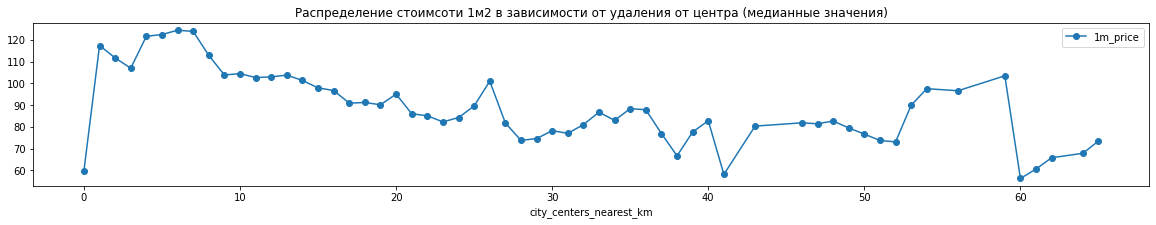

In [133]:
#визуализируем
df.pivot_table(index='city_centers_nearest_km', values='1m_price', aggfunc='median').plot(style='o-', figsize=(20, 3));
plt.title('Распределение стоимсоти 1м2 в зависимости от удаления от центра (медианные значения)');

In [134]:
#строим сводную таблицу по средним значениям:
df.pivot_table(index='city_centers_nearest_km', values='1m_price', aggfunc='mean')

,1m_price
city_centers_nearest_km,
0,62.565222
1,137.794663
2,139.642568
3,121.327473
4,130.019946
5,138.326350
6,145.378414
7,137.393764
8,118.624602


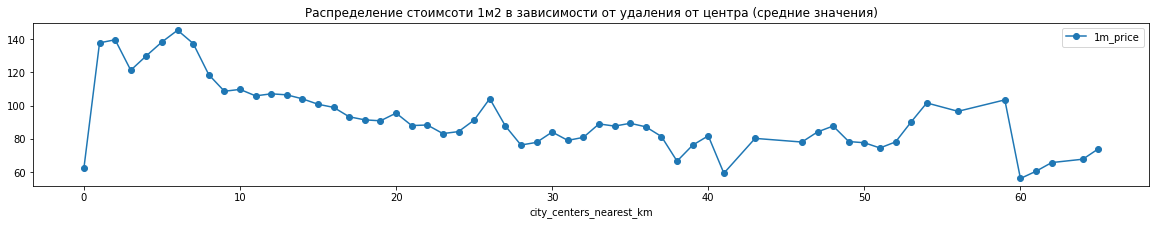

In [135]:
#визуализируем
df.pivot_table(index='city_centers_nearest_km', values='1m_price', aggfunc='mean').plot(style='o-', figsize=(20, 3));
plt.title('Распределение стоимсоти 1м2 в зависимости от удаления от центра (средние значения)');

In [136]:
df.loc[df['city_centers_nearest_km'] == 42] #посмотрим, что за скачок на 42 км:

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,1m_price,day_of_publishing,month_of_publishing,year_of_publishing,floor_type,city_centers_nearest_km


Ожидаемо, чем меньше расстояние от центра - тем выше стоимость. Самая высокая стоимость у недвижимости, расположенной в радиусе 2км. от центра. Есть небольшие исключения, допустим, на 26км (туда попадает г. Пушкин), из-за чего средняя цена получается выше. 


### Общий вывод

Проанализировав объявления о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет можно сделать следующие выводы:

- В основном представлены квартиры до 40м2, средняя площадь составляет 61м2.
- Большее количестов объявлений имеют жилую площадь до 30м2, в среднем - 30-35м2 
- В среднем площадь кухни составляет 9,8м., чуть менее распространены 6-ти и 8-и метровые.
- Самая высокая цена за м2 в однушках, студиях и аппартаментах, также высоко ценятся 5-ти и 6-ти комнатные квартиры, имеющие  еще и историческую ценность. Средняя стоимость квартиры - 6.5 млн.
- больше всего на рынке 2-ух комнатных квартир, следом идут 1 и 3-х комнатные. 5, 6 и 7 - скорее редкость, остальные - в рамках погрешности, часто в единственном экземпляре.
- Средняя высота потолков - 2.7 м., основная масса значений находится в диапазоне 2.5 м. - 4 м.
- Доля квартир на первом этаже составляют 12.43 % на последнем - 14.42 %. Квартиры на первом и последнем этаже дешевле чем на других этажах. Также на первом этаже цена существенно ниже чем на последнемм
- В основном кавртиры расположены в 5-ти и 9-ти этажных зданиях
- Больше всего объектов расположено в диапазоне 10-20 км. от центра города. 
- у 22.76 % объектов рядом отсутствует аэропорт, у  65.6 % объектов рядом нет парка.
- Больше всего объявлений было размещено в четверг, меньше всего - в воскресенье. Больше всего объявлений размещается в конце зимы - начале весны, это же время считается лучшим для продажи квартиры. Лидер по количеству объявлений - февраль, меньше всего опубликовано было в мае. 
- Наибольшее значение цены м2 у объявлений, выставленных в апреле и декабре, наименьшая - у объявлений выставленных в мае и июне.
- Обычно объявления размещаются на период до 3 месяцев, что можно считать достаточно быстрой продажей, но достаточно много объявлений "висит" и дольше. Среднее время продажи - 159 дней.
- Чем меньше расстояние от центра - тем выше стоимость.Самая высокая стоимость у недвижимости, расположенной в радиусе 2км. от центра. Самая высокая средняя цена за 1м2 среди 10-ти самых распространненных населенных пунктов в Санкт-Петербурге и Пушкине, самая низкая - в Выборге.
- Средняя цена кв. метра растет до 2014, затем падает до 2017г, далее растет до 2019г.

В дальнейшем, во избежание ошибок и неоправданных выбросов, при сборе данных стоит контролировать получаемые значения - ограничить высоту потолка правдоподобными 6 метрами, сделать поле общей этажности дома обязательным, равно как площадь кухни, жилую площадь и т.д..
